<a href="https://colab.research.google.com/github/jirvingphd/dsc-2-final-project-online-ds-ft-021119/blob/master/_Mod2_Project_JMI_04_07_19_H1_H3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Final Project Submission
- Student:
- Github Link:
- Reviewer:
- Review Date:
- Video Link:
- Blog Post:

<a href="https://colab.research.google.com/github/jirvingphd/dsc-2-final-project-online-ds-ft-021119/blob/master/Formatted_Mod2Proj_H2_FIN_JMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Deliverables
> **The goal of this project** is to test your ability to gather information from a real-world database and use your knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company.


In addition to answering this question with a hypothesis test, you will also need to come up with **_at least 3 other hypotheses to test on your own_**.  

These can by **anything that you think could be imporant information _for the company_.** 

For this hypothesis, be sure to specify both the **_null hypothesis_** and the **_alternative hypothesis_** for your question.  You should also specify if this is one-tail or a two-tail test. 

To complete this project, you will need to turn in the following 3 deliverables:

1. A **_Jupyter Notebook_** containing any code you've written for this project. 
2. A **_Blog Post_** explaining your process, methodology, and findings.  
3. An **_"Executive Summary" PowerPoint Presentation_** that explains the hypothesis tests you ran, your findings, and their relevance to company stakeholders.  

### Jupyter Notebook Must-Haves

For this project, your jupyter notebook should meet the following specifications:

**_Organization/Code Cleanliness_**

* The notebook should be well organized, easy to follow, and code is commented where appropriate.  
<br>  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code. All functions have docstrings that act as professional-quality documentation.  
<br>      
* The notebook is written to technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.  
<br>    
* Any SQL code written to source data should also be included.  

**_Findings_**

* Your notebook should clearly show how you arrived at your results for each hypothesis test, including how you calculated your p-values.   
<br>
* You should also include any other statistics that you find relevant to your analysis, such as effect size. 

___

## Hypothesis Testing Workflow
1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```
2. **Test for Homogeneity of Variance**
    - Levene's Test<br>
     ```scipy.stats.levene```

3. **Choose appropriate test based upon 1. and 2.** 

4. **Post-hoc comparisons**

# Importing of Packages and Defining Functions

## Import packages:

In [1]:
# Normal packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# Statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as stats


# Counter
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import sklearn.metrics as metrics


import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Define Functions (from proj 1)

### def check_column

In [0]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series,nlargest='all'):
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series)*100,3)}%")
        
    print(f'\nUnique non-na values:') #,df['waterfront'].unique())
    if nlargest =='all':
        print(series.value_counts())
    else:
        print(series.value_counts().nlargest(nlargest))

### def multiplot

In [0]:
# MULTIPLOT
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def multiplot(df):
    """Plots results from df.corr() in a correlation heat map for multicollinearity.
    Returns fig, ax objects"""
    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 16))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0,
                
    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return f, ax

### def detect_outliers

In [0]:
# Tukey's method using IQR to eliminate 
def detect_outliers(df, n, features):
    """Uses Tukey's method to return outer of interquartile ranges to return indices if outliers in a dataframe.
    Parameters:
    df (DataFrame): DataFrane containing columns of features
    n: default is 0, multiple outlier cutoff  
    
    Returns:
    Index of outliers for .loc
    
    Examples:
    Outliers_to_drop = detect_outliers(data,2,["col1","col2"]) Returning value
    df.loc[Outliers_to_drop] # Show the outliers rows
    data= data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
   """

# Drop outliers    

    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers 


### def plot_hist_scat_sns

In [0]:
# Plots histogram and scatter (vs price) side by side
def plot_hist_scat_sns(df, target='index'):
    """Plots seaborne distplots and regplots for columns im datamframe vs target.

    Parameters:
    df (DataFrame): DataFrame.describe() columns will be used. 
    target = name of column containing target variable.assume first coluumn. 
    
    Returns:
    Figures for each column vs target with 2 subplots.
   """
    import matplotlib.ticker as mtick
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    with plt.style.context(('dark_background')):
        ###  DEFINE AESTHETIC CUSTOMIZATIONS  -------------------------------##


#         plt.style.use('dark_background')
        figsize=(9,7)

        # Axis Label fonts
        fontTitle = {'fontsize': 14,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontAxis = {'fontsize': 12,
                   'fontweight': 'medium',
                    'fontfamily':'serif'}

        fontTicks = {'fontsize': 8,
                   'fontweight':'medium',
                    'fontfamily':'serif'}

        # Formatting dollar sign labels
        fmtPrice = '${x:,.0f}'
        tickPrice = mtick.StrMethodFormatter(fmtPrice)


        ###  PLOTTING ----------------------------- ------------------------ ##

        # Loop through dataframe to plot
        for column in df.describe():
#             print(f'\nCurrent column: {column}')

            # Create figure with subplots for current column
            fig, ax = plt.subplots(figsize=figsize, ncols=2, nrows=2)

            ##  SUBPLOT 1 --------------------------------------------------##
            i,j = 0,0
            ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

            # Define graphing keyword dictionaries for distplot (Subplot 1)
            hist_kws = {"linewidth": 1, "alpha": 1, "color": 'blue','edgecolor':'w'}
            kde_kws = {"color": "white", "linewidth": 1, "label": "KDE"}

            # Plot distplot on ax[i,j] using hist_kws and kde_kws
            sns.distplot(df[column], norm_hist=True, kde=True,
                         hist_kws = hist_kws, kde_kws = kde_kws,
                         label=column+' histogram', ax=ax[i,j])


            # Set x axis label
            ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

            # Get x-ticks, rotate labels, and return
            xticklab1 = ax[i,j].get_xticklabels(which = 'both')
            ax[i,j].set_xticklabels(labels=xticklab1, fontdict=fontTicks, rotation=0)
            ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())


            # Set y-label 
            ax[i,j].set_ylabel('Density',fontdict=fontAxis)
            yticklab1=ax[i,j].get_yticklabels(which='both')
            ax[i,j].set_yticklabels(labels=yticklab1,fontdict=fontTicks)
            ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())


            # Set y-grid
            ax[i, j].set_axisbelow(True)
            ax[i, j].grid(axis='y',ls='--')




            ##  SUBPLOT 2-------------------------------------------------- ##
            i,j = 0,1
            ax[i,j].set_title(column.capitalize(),fontdict=fontTitle)

            # Define the kwd dictionaries for scatter and regression line (subplot 2)
            line_kws={"color":"white","alpha":0.5,"lw":4,"ls":":"}
            scatter_kws={'s': 2, 'alpha': 0.5,'marker':'.','color':'blue'}

            # Plot regplot on ax[i,j] using line_kws and scatter_kws
            sns.regplot(df[column], df[target], 
                        line_kws = line_kws,
                        scatter_kws = scatter_kws,
                        ax=ax[i,j])

            # Set x-axis label
            ax[i,j].set_xlabel(column.title(),fontdict=fontAxis)

             # Get x ticks, rotate labels, and return
            xticklab2=ax[i,j].get_xticklabels(which='both')
            ax[i,j].set_xticklabels(labels=xticklab2,fontdict=fontTicks, rotation=0)
            ax[i,j].xaxis.set_major_formatter(mtick.ScalarFormatter())

            # Set  y-axis label
            ax[i,j].set_ylabel(target,fontdict=fontAxis)

            # Get, set, and format y-axis Price labels
            yticklab = ax[i,j].get_yticklabels()
            ax[i,j].set_yticklabels(yticklab,fontdict=fontTicks)
            ax[i,j].yaxis.set_major_formatter(mtick.ScalarFormatter())

    #         ax[i,j].get_yaxis().set_major_formatter(tickPrice) 

            # Set y-grid
            ax[i, j].set_axisbelow(True)
            ax[i, j].grid(axis='y',ls='--')       

            ## ---------- Final layout adjustments ----------- ##
            # Deleted unused subplots 
            fig.delaxes(ax[1,1])
            fig.delaxes(ax[1,0])

            # Optimizing spatial layout
            fig.tight_layout()
            figtitle=column+'_dist_regr_plots.png'
#             plt.savefig(figtitle)
    return 

## Defining Functions (Proj 2 specific)

### def plot_wide_kde_mean_sem_bar()

In [0]:
def plot_wide_kde_thin_bar(series1,sname1, series2, sname2):
    '''Plot series1 and series 2 on wide kde plot with small mean+sem bar plot.'''
    
    ## ADDING add_gridspec usage
    import pandas as pd
    import numpy as np
    from scipy.stats import sem

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import matplotlib.ticker as ticker
    %matplotlib inline

    import seaborn as sns

    from matplotlib import rcParams
    from matplotlib import rc
    rcParams['font.family'] = 'serif'




    # Plot distributions of discounted vs full price groups
    plt.style.use('default')
    # with plt.style.context(('tableau-colorblind10')):
    with plt.style.context(('seaborn-notebook')):

        

        ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##
       # Axis Label fonts
        fontSuptitle ={'fontsize': 22,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontTitle = {'fontsize': 10,
                   'fontweight': 'medium',
                    'fontfamily':'serif'}

        fontAxis = {'fontsize': 10,
                   'fontweight': 'medium',
                    'fontfamily':'serif'}

        fontTicks = {'fontsize': 8,
                   'fontweight':'medium', 
                    'fontfamily':'serif'}


        ## --------- CREATE FIG BASED ON GRIDSPEC --------- ##
        
        plt.suptitle('Quantity of Units Sold', fontdict = fontSuptitle)

        # Create fig object and declare figsize
        fig = plt.figure(constrained_layout=True, figsize=(8,3))
        
        # Define gridspec to create grid coordinates             
        gs = fig.add_gridspec(nrows=2,ncols=20)

        # Assign grid space to ax with add_subplot
        ax0 = fig.add_subplot(gs[:,0:16])
        ax1 = fig.add_subplot(gs[:,16:])
        
        #Combine into 1 list
        ax = [ax0,ax1]
        
        ## --------- DEFINE SUBPLOT GROUPS DATA, LABELS, AND STYLE --------- ##
        
        
        ax[0].set_title('Histogram + KDE',fontdict=fontTitle)

        # Group 1: data, label, hist_kws and kde_kws
        plotS1 = {'data': series1, 'label': sname1.title(),

                   'hist_kws' :
                    {'edgecolor': 'black', 'color':'darkgray','alpha': 0.8, 'lw':0.5},

                   'kde_kws':
                    {'color':'gray', 'linestyle': '--', 'linewidth':2,
                     'label':'kde'}}

        # Group 2: data, label, hist_kws and kde_kws
        plotS2 = {'data': series2,
                    'label': sname2.title(), 

                    'hist_kws' :
                    {'edgecolor': 'black','color':'green','alpha':0.8 ,'lw':0.5},


                    'kde_kws':
                    {'color':'darkgreen','linestyle':':','linewidth':3,'label':'kde'}}
        
        # plot group 1
        sns.distplot(plotS1['data'], label=plotS1['label'],
                   
                     hist_kws = plotS1['hist_kws'], kde_kws = plotS1['kde_kws'],
                     
                     ax=ax[0])   
      

        # plot group 2
        sns.distplot(plotS2['data'], label=plotS2['label'],
                     
                     hist_kws=plotS2['hist_kws'], kde_kws = plotS2['kde_kws'],
                     
                     ax=ax[0])


        ax[0].set_xlabel(series1.name, fontdict=fontAxis)
        ax[0].set_ylabel('Kernel Density Estimation',fontdict=fontAxis)

        ax[0].tick_params(axis='both',labelsize=fontTicks['fontsize'])   
        ax[0].legend()


        # SUBPLOT 2 
        # Import scipy for error bars
        from scipy import stats

        x = [plotS1['label'], plotS2['label']]
        y = [np.mean(plotS1['data']),np.mean(plotS2['data'])]

        yerr = [stats.sem(plotS1['data']),  stats.sem(plotS2['data'])]
        err_kws = {'ecolor':'black','capsize':10,'capthick':1,'elinewidth':1}

        ax[1].bar(x,y,align='center', edgecolor='black', yerr=yerr,error_kw=err_kws,width=0.6)

        # Customize subplot 2
        ax[1].set_title('Average Quantities Sold',fontdict=fontTitle)
#         ax[1].set_xlabel('Sales Price', fontdict=fontAxis)
        ax[1].set_ylabel('Mean +/- SEM ',fontdict=fontAxis)
        ax[1].tick_params(axis=y,labelsize=fontTicks['fontsize'])

        ax[1].tick_params(axis=x,labelsize=fontTicks['fontsize'],rotation=45)
#         fig.savefig('H1_EDA_using_gridspec.png')
        plt.tight_layout()
    #     print(f')

        plt.show()
        return fig,ax


### def list2df

In [0]:
def list2df(list):#, sort_values='index'):
    """ Take in a list where row[0] = column_names and outputs a dataframe.
    
    Keyword arguments:
    set_index -- df.set_index(set_index)
    sortby -- df.sorted()
    """    
    
    df_list = pd.DataFrame(list[1:],columns=list[0])
#     df_list = df_list[1:]

    return df_list

### def get_col_info

In [0]:
def  get_col_info(col_name):
    """Gets the column names and data types from the alchamey inspector object.
    Returns column_info dataframe of table details.
    """
    col_list = inspector.get_columns(col_name)
    
    column_info = [['table','column','dtype']]
    print(f'Table Name: {col_name}\n')

    for col in col_list:
        column_info.append([str(col_name),col['name'], col['type']])
        
    df = list2df(column_info)
    return column_info

### def describe_outliers

In [0]:
# describe_outliers -- calls detect_outliers
def describe_outliers(df):
    """ Returns a new_df of outliers, and % outliers each col using detect_outliers.
    """
    out_count = 0
    new_df = pd.DataFrame(columns=['total_outliers', 'percent_total'])
    for col in df.columns:
        outies = detect_outliers(df[col])
        out_count += len(outies) 
        new_df.loc[col] = [len(outies), round((len(outies)/len(df.index))*100, 2)]
    new_df.loc['grand_total'] = [sum(new_df['total_outliers']), sum(new_df['percent_total'])]
    return new_df

### def get_full_table_info

In [0]:
def  get_full_table_info(engine):
    """Gets the table names, their column namesand data types engine.
    Returns column_info dataframe of table details.
    """
    column_info = [['table','column','dtype']]
    
    list_tables= engine.table_names()
    
    for table in list_tables:
        
        col_list = inspector.get_columns(table)
        
        for col in col_list:
            
            column_info.append([str(table),col['name'], col['type'],col['']])
            inspector.get_foreign_keys()
    
    df = list2df(column_info)
    return df

### def Cohen's d 

In [0]:
#### Cohen's d
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    pyplot.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    pyplot.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)
   

#### def quant_transform 

In [0]:
# TRANSFORM DATA BEFORE RE-CALLING ORIGINAL normtest_results
def quant_transform(data_in):
    '''Use sklearn.preprocessing.QuantileTransformer to remove outliers from dataset.
    
    Parameters:
        data_in (dict) -- dictionary with data series as values to be processed.
    Returns: 
        data_tf (dict) -- dicionary of same keys from data_in, but transformed.
        '''
    
    from sklearn import preprocessing as prep 
    from sklearn.preprocessing import QuantileTransformer

    qt =  QuantileTransformer(n_quantiles=10,output_distribution='normal')
    data_tf = {}
    for k,v in data_in.items():    
        data = np.array(v).reshape(-1,1)
        transformed = pd.Series(np.squeeze(qt.fit_transform(data)))
      
        data_tf[k] = transformed
    
    return data_tf

## Define plotting functions for looking at each month individually 


### def make_violinplot

In [0]:
# plotting order totals per month in violin plots

def make_violinplot(x,y, title=None, hue=None, ticklabels=None):
  
  '''Plots a violin plot with horizontal mean line, inner stick lines'''
  
  plt.style.use('dark_background')
  fig,ax =plt.subplots(figsize=(12,10))


  sns.violinplot(x, y,cut=2,split=True, scale='count', scale_hue=True,
                 saturation=.5, alpha=.9,bw=.25, palette='Dark2',inner='stick', hue=hue).set_title(title)

  ax.axhline(y.mean(),label='total mean', ls=':', alpha=.5, color='xkcd:yellow')
  ax.set_xticklabels(ticklabels)

  plt.legend()
  plt.show()
  x= df_year_orders['month']
  y= df_year_orders['order_total']
  title = 'Order totals per month with or without discounts'
  hue=df_year_orders['Discount']>0

### def make-stripplot

In [0]:
def make_stripplot(x, y, title=None, hue=None, ticklabels=None):

  plt.style.use('dark_background')
  fig,ax =plt.subplots(figsize=(8,6))


  sns.stripplot(x, y, jitter=True, size=12,edgecolor='gray',linewidth=1.5, alpha=.5, palette='Dark2',marker='d', hue=hue).set_title(title)

  ax.axhline(y.mean(),label='total mean', ls=':', alpha=.5, color='xkcd:yellow')
  ax.set_xticklabels(ticklabels)

  plt.legend()
  plt.show()


### def draw_histograms

In [0]:
plt.style.use('default')
def draw_histograms(df, variable, sample_dict, n_rows, n_cols):

  '''Takes dataframe, variable is column name , plots histograms '''
  
  with plt.style.context('seaborn-paper'):

    fig = plt.figure(figsize=(10,10))

    for k,v in sample_dict.items():

      month = df[df[variable] == k]['order_total']
      month_mean = round(np.mean(month),2)

      year =  df[df['month'] != k]['order_total']
      year_mean = round(np.mean(year),2)

      ax = fig.add_subplot(n_rows,n_cols,k)
      ax.tick_params(labelsize=8)

      plt.hist(year, bins=90,alpha=.7, label='Rest of Year')
      plt.hist(month, alpha=.6,label= v.title())

      ax.set_title(v.title(),fontsize=14)

      plt.axvline(month_mean, color='xkcd:fuchsia',linestyle='--',
                  label='Sample Mean \n'+str(month_mean))

      plt.axvline(year_mean,color='xkcd:green',linestyle='-',
                  label='Pop. Mean \n'+str(year_mean))

      plt.legend(fontsize=6, frameon=False, ncol = 2 )

    fig.tight_layout()    
    plt.show()

### def draw_histograms_sample 

In [0]:
def draw_histograms_from_sample(population,sample, sample_dict, n_rows, n_cols):

  fig = plt.figure(figsize=(8.5,7.5))
  count = 0
  
  for k,v in sample_dict.items():
    
    count += 1                        

    month = sample_dict[k] #pop_samp_month_dict[k]
    month_mean = round(np.mean(v),2)
    
    year = population
    year_mean = round(np.mean(population),2)

    ax = fig.add_subplot(n_rows,n_cols, count)
    ax.tick_params(labelsize=8)

    plt.hist(year, alpha=.8, label='All Months')
    plt.hist(month, alpha=.6, label = v.title())

    ax.set_title(k.title(),fontsize=14)

    plt.axvline(month_mean, color='xkcd:fuchsia',linestyle='--',
                label='Sample Mean \n'+str(month_mean))
    plt.axvline(year_mean,color='xkcd:green',linestyle='-',
                label='Pop. Mean \n'+str(year_mean))
    
    plt.legend(fontsize=6, frameon=False)
    
  fig.tight_layout()    
  plt.show()

### IMPORTING TO BE ABLE TO DISPLAY BETTER TABLES

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from IPython.display import HTML

# df.style.set_properties( color='black',align='center')
#                         **{'background-color': 'black',
#                             'color': 'lawngreen',
#                             'border-color': 'white'})

___


| H# |         Groups         | Normality<br> D'Agostino Pearson | Equal Variance Levene's Test |   Test Chosen  |      Test Results      | Reject Null? | Perform Post-Hoc? |
|:--:|:----------------------:|:--------------------------------:|:----------------------------:|:--------------:|:----------------------:|:------------:|:-----------------:|
|  1 | A: Discounted Products |      stat:261.5280, p<0.0001     |       14.8327, p=.0001       | Mann-Whitney U | stat: 642105, p<0.0001 |              |                   |
|  1 | B: Full Price Products |      stat:544.5770, p<0.0001     |       14.8327, p=.0001       | Mann-Whitney U | stat: 642105, p<0.0001 |              |                   |
|    |                        |                                  |                              |                |                        |              |                   |

# **EXPERIMENTAL DESIGN AND HYPOTHESIS**

You will need query the database to get the data needed to perform a statistical analysis.  In this statistical analysis, **you'll need to perform a hypothesis test (or perhaps several) to answer the following question:**


> **_Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?_**

### Hypothesis 1:


$H_1$ : Products that are discounted sell in higher quantities.

$H_0$ : Products that are discount sell the same amounts as non-discounted products.




### Hypothesis 2:

- $H_1$: Customers buy more of other store items when they are buying discounted items.
- $H_0$: Customers buy the same ***amount*** of items
$H_1$ : Products that are discounted sell in higher quantities.

$H_0$ : Products that are discount sell the same amount as full price products.


### Hypothesis 3:

- $H_1$: 
- $H_0$:   
<br>

### Hypothesis 4:
- $H_1$: 
- $H_0$:   
<br>


___
# **Hypothesis 1:**
>**Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?**

$H_1$ : Products that are discounted sell in higher quantities.

$H_0$ : Products that are discount sell the same amounts as non-discounted products.


**Specific Aims:**

* ***Aim 1:To select the proper dataset for analysis, perform EDA, and generate data groups for testing.***
    - Used sqlalchemy and pandas.read_sql_query()
    query = "SELECT* FROM OrderDetails,
            GROUPBY discount

* ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
    1. **Test for Normality**
        - D'Agostino-Pearson's normality test<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```
    2. **Test for Homogeneity of Variance**
        - Levene's Test<br>
         ```scipy.stats.levene```

    3. **Choose appropriate test based upon 1. and 2.** 
        - Mann-Whitney U test (non parametric equivalent of ANOVA)<br>
        ```stats.mannwhitneyu```<br>
        

* ***Aim 3: To perform post-hoc painrwise comparison testing to determine which level of discounts affect quantity and if any discount has a greater effect than the others.***
     - Tukey's test for multiple pairwise comparisons


_________
## ***Aim 1.1 : To select the proper dataset for analyiss  and generate data groups for testing.***

#### Importing Method
- Use sqlalchemy to create engine to connect to Northwind_small.sqlite.
- use pd.read_sql_query('SELECT * FROM OrderDetail',egine) to directly read db into df

In [0]:
# h4_df = pd.read_csv(path+'h4_df.csv')
# h4_pop_df = pd.read_csv(path+'h4_pop_df.csv')

In [19]:
# #CELL A : IF ON COLAB.
# #The northwind.sqlite is located in: content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# # If in Google Drive 
path= '/content/drive/My Drive/Colab Notebooks/datasets/'
file='Northwind_small.sqlite'
filepath = path+file
# filepath = '/content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite'


#NOTE: To save files to drive, just to df.to_csv(path+'filename.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# #CELL B: If RUNNING LOCALLY.
# filepath = 'Northwind_small.sqlite'

#### Use sqlalchemy and pandas to inspect data tables

In [21]:
# Import packages for sql
import sqlite3
from sqlalchemy import create_engine, inspect
# from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey,text, Float

engine = create_engine('sqlite:///'+filepath,echo=True);

inspector = inspect(engine);

db_tables = inspector.get_table_names();

print('\n',db_tables);

2019-04-07 20:50:51,301 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-07 20:50:51,303 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:50:51,313 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-07 20:50:51,314 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:50:51,325 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-07 20:50:51,326 INFO sqlalchemy.engine.base.Engine ()

 ['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [22]:
list2df(get_col_info('OrderDetail'))

2019-04-07 20:50:51,352 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("OrderDetail")
2019-04-07 20:50:51,355 INFO sqlalchemy.engine.base.Engine ()
Table Name: OrderDetail



,table,column,dtype
0,OrderDetail,Id,VARCHAR(8000)
1,OrderDetail,OrderId,INTEGER
2,OrderDetail,ProductId,INTEGER
3,OrderDetail,UnitPrice,DECIMAL
4,OrderDetail,Quantity,INTEGER
5,OrderDetail,Discount,FLOAT


#### Load in table OrderDetail for hypothesis 1

In [23]:
# We want to test hypothesis one, so we need OrderDetail table.
table_to_test = "OrderDetail"
df_od = pd.read_sql_query("SELECT * FROM OrderDetail",  engine)
df_o = pd.read_sql_query("SELECT * FROM [Order]",  engine)
df_o.info()
df_o.rename({'Id':'OrderId'},axis=1,inplace=True)

df = df_od.merge(df_o, on = 'OrderId')
# df_o.head()
df.to_csv('OrderId_Order.csv')
df.head()

2019-04-07 20:50:51,404 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-04-07 20:50:51,406 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:50:51,428 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Order]
2019-04-07 20:50:51,429 INFO sqlalchemy.engine.base.Engine ()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248/11,10248,11,14.0,12,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10248/42,10248,42,9.8,10,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
2,10248/72,10248,72,34.8,5,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
3,10249/14,10249,14,18.6,9,0.0,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
4,10249/51,10249,51,42.4,40,0.0,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany


In [24]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 19 columns):
Id                2155 non-null object
OrderId           2155 non-null int64
ProductId         2155 non-null int64
UnitPrice         2155 non-null float64
Quantity          2155 non-null int64
Discount          2155 non-null float64
CustomerId        2155 non-null object
EmployeeId        2155 non-null int64
OrderDate         2155 non-null object
RequiredDate      2155 non-null object
ShippedDate       2082 non-null object
ShipVia           2155 non-null int64
Freight           2155 non-null float64
ShipName          2155 non-null object
ShipAddress       2155 non-null object
ShipCity          2155 non-null object
ShipRegion        2155 non-null object
ShipPostalCode    2100 non-null object
ShipCountry       2155 non-null object
dtypes: float64(3), int64(5), object(11)
memory usage: 336.7+ KB


In [25]:
# Checking the levels of discount
# sorted(df['Discount'].unique())
counts = df['Discount'].value_counts()
counts.sort_index()
count_dict = dict(zip(counts.index, counts.values))
count_dict

{0.0: 1317,
 0.01: 1,
 0.02: 2,
 0.03: 3,
 0.04: 1,
 0.05: 185,
 0.06: 1,
 0.1: 173,
 0.15: 157,
 0.2: 161,
 0.25: 154}

### Aim 1.2: EDA on dataset

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


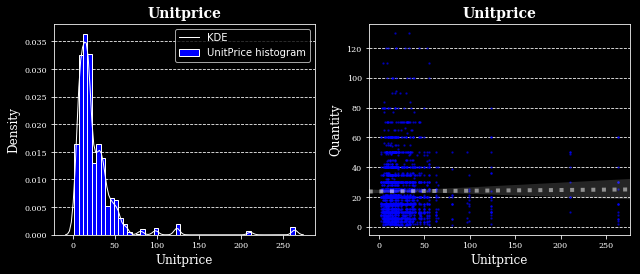

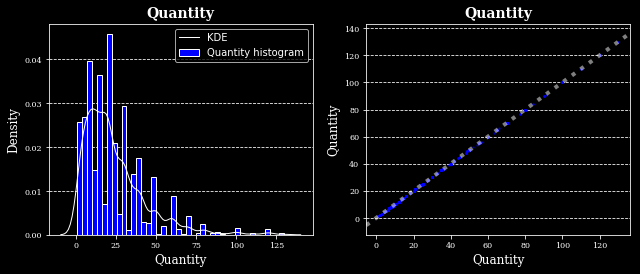

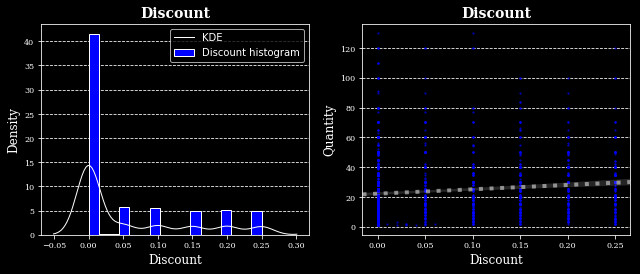

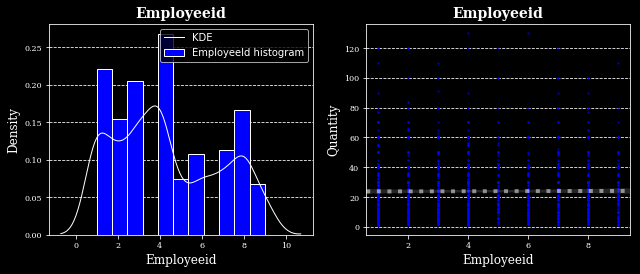

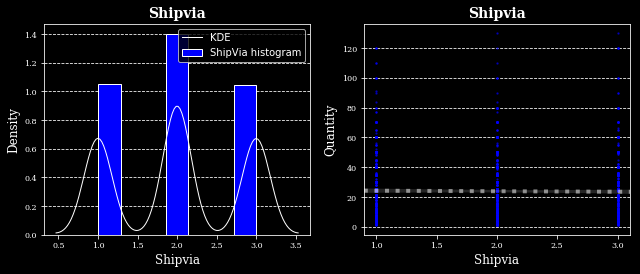

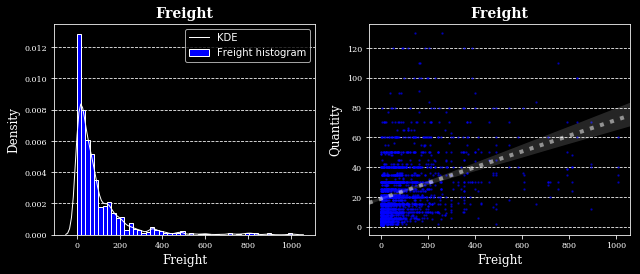

In [26]:
# df['Quantity'].groupby(df['Discount']).plot(kind='bar')
plot_hist_scat_sns(df.drop(['OrderId','ProductId'],axis=1),'Quantity')

#### Note on OrderDetails df:
1. There are 11 possible values for discounts: 
    - Values = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]<br>
    - However, there are very few entries for some of the levels of value.
    ``` print(sorted(df['Discount'].unique())) ```
2. The data for quantity looks skewed and not-normal. 
    - Normality tests will likely come back significant 
    

### Aim 1.3: Generated and inspect the required groups
- Generate the groups that we want to test.
    - Discounted
    - Full price 
- Once review, use info to determine next steps.

In [27]:
# Print the descriptive statistics.
df_discounted = df.loc[df['Discount']>0]
df_fullprice = df.loc[df['Discount']==0]

print(f'\nAll Quantities:')
df.drop(['OrderId','ProductId'],axis=1).describe().round()


All Quantities:


,UnitPrice,Quantity,Discount,EmployeeId,ShipVia,Freight
count,2155.0,2155.0,2155.0,2155.0,2155.0,2155.0
mean,26.0,24.0,0.0,4.0,2.0,96.0
std,30.0,19.0,0.0,2.0,1.0,133.0
min,2.0,1.0,0.0,1.0,1.0,0.0
25%,12.0,10.0,0.0,2.0,1.0,20.0
50%,18.0,20.0,0.0,4.0,2.0,54.0
75%,32.0,30.0,0.0,7.0,3.0,121.0
max,264.0,130.0,0.0,9.0,3.0,1008.0


In [28]:
print(f'\nDiscounted Quantities:')

df_discounted.drop(['OrderId','ProductId'],axis=1).describe().round()


Discounted Quantities:


,UnitPrice,Quantity,Discount,EmployeeId,ShipVia,Freight
count,838.0,838.0,838.0,838.0,838.0,838.0
mean,26.0,27.0,0.0,4.0,2.0,100.0
std,30.0,21.0,0.0,2.0,1.0,126.0
min,2.0,1.0,0.0,1.0,1.0,0.0
25%,12.0,12.0,0.0,2.0,1.0,25.0
50%,18.0,20.0,0.0,4.0,2.0,60.0
75%,31.0,36.0,0.0,7.0,3.0,123.0
max,264.0,130.0,0.0,9.0,3.0,891.0


In [29]:
print(f'Full price Quantities:\n')
df_fullprice.drop(['OrderId','ProductId'],axis=1).describe().round()

Full price Quantities:



,UnitPrice,Quantity,Discount,EmployeeId,ShipVia,Freight
count,1317.0,1317.0,1317.0,1317.0,1317.0,1317.0
mean,26.0,22.0,0.0,4.0,2.0,94.0
std,30.0,18.0,0.0,2.0,1.0,137.0
min,2.0,1.0,0.0,1.0,1.0,0.0
25%,12.0,10.0,0.0,2.0,1.0,15.0
50%,18.0,18.0,0.0,4.0,2.0,47.0
75%,33.0,30.0,0.0,6.0,3.0,117.0
max,264.0,130.0,0.0,9.0,3.0,1008.0


### Plotting Summary EDA Figure

#### def plot_wide_kde_mean_sem_bar()

In [0]:
## MOVED TO IMPORTING AND DELCARING SECTION AT TOP
# def plot_wide_kde_thin_bar(series1,sname1, series2, sname2):
#     '''Plot series1 and series 2 on wide kde plot with small mean+sem bar plot.'''
    
#     ## ADDING add_gridspec usage
#     import pandas as pd
#     import matplotlib.pyplot as plt
#     import matplotlib as mpl
#     import matplotlib.ticker as ticker
#     import seaborn as sns
#     import numpy as np
#     from scipy.stats import sem


#     from matplotlib import rcParams
#     from matplotlib import rc
#     rcParams['font.family'] = 'serif'
# #     rcParams['font.sans-serif'] = ['Tahoma']
#     # rcParams[]

#     # import matplotlib.pyplot as plt


#     %matplotlib inline

#     # Plot distributions of discounted vs full price groups
#     plt.style.use('default')
#     # with plt.style.context(('tableau-colorblind10')):
#     with plt.style.context(('seaborn-notebook')):

        
        

#         ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##
#        # Axis Label fonts
#         fontSuptitle ={'fontsize': 22,
#                    'fontweight': 'bold',
#                     'fontfamily':'serif'}

#         fontTitle = {'fontsize': 10,
#                    'fontweight': 'medium',
#                     'fontfamily':'serif'}

#         fontAxis = {'fontsize': 10,
#                    'fontweight': 'medium',
#                     'fontfamily':'serif'}

#         fontTicks = {'fontsize': 8,
#                    'fontweight':'medium', 
#                     'fontfamily':'serif'}


        
#         plt.suptitle('Quantity of Units Sold', fontdict=fontSuptitle)

#         # Create fig object and declare figsize
#         fig = plt.figure(constrained_layout=True, figsize=(8,3))
        
#         # Define gridspec to create grid coordinates             
#         gs = fig.add_gridspec(nrows=2,ncols=20)

#         # Assign grid space to ax with add_subplot
#         ax0 = fig.add_subplot(gs[:,0:16])
#         ax1 = fig.add_subplot(gs[:,16:])
        
#         #Combine into 1 list
#         ax = [ax0,ax1]
        
#         ## --------- DEFINE SUBPLOT GROUPS DATA, LABELS, AND STYLE --------- ##

#         # Group 1: data, label, hist_kws and kde_kws
#         plotS1 = {'data': series1, 
#                     'label': sname1.title(),

#                    'hist_kws' :
#                     {'edgecolor': 'black',
#                      'color':'darkgray',
#                      'alpha': 0.8,
#                      'lw':0.5},

#                    'kde_kws':
#                     {'color':'gray',
#                      'linestyle': '--', 
#                      'linewidth':2,
#                      'label':'kde'}}


#         sns.distplot(plotS1['data'], label=plotS1['label'],
#                      hist_kws = plotS1['hist_kws'],
#                      kde_kws = plotS1['kde_kws'], ax=ax[0])   




#         # Group 2: data, label, hist_kws and kde_kws

#         plotS2 = {'data': series2,
#                     'label': sname2.title(), 

#                     'hist_kws' :
#                     {'edgecolor': 'black','color':'green','alpha':0.8 ,'lw':0.5},


#                     'kde_kws':
#                     {'color':'darkgreen','linestyle':':','linewidth':3,'label':'kde'}}


#         sns.distplot(plotS2['data'], label=plotS2['label'],
#                      hist_kws=plotS2['hist_kws'],
#                      kde_kws = plotS2['kde_kws'],ax=ax[0])


#         ax[0].set_title('Histogram + KDE',fontdict=fontTitle)
#         ax[0].set_xlabel(series1.name, fontdict=fontAxis)
#         ax[0].set_ylabel('Kernel Density Estimation',fontdict=fontAxis)

#         ax[0].tick_params(axis='both',labelsize=fontTicks['fontsize'])   
#         ax[0].legend()


#         # SUBPLOT 2 
#         # Import scipy for error bars
#         from scipy import stats

#         x = [plotS1['label'], plotS2['label']]
#         y = [np.mean(plotS1['data']),np.mean(plotS2['data'])]

#         yerr = [stats.sem(plotS1['data']),  stats.sem(plotS2['data'])]
#         err_kws = {'ecolor':'black','capsize':10,'capthick':1,'elinewidth':1}

#         ax[1].bar(x,y,align='center', edgecolor='black', yerr=yerr,error_kw=err_kws,width=0.6)

#         # Customize subplot 2
#         ax[1].set_title('Average Quantities Sold',fontdict=fontTitle)
# #         ax[1].set_xlabel('Sales Price', fontdict=fontAxis)
#         ax[1].set_ylabel('Mean +/- SEM ',fontdict=fontAxis)
#         ax[1].tick_params(axis=y,labelsize=fontTicks['fontsize'])

#         ax[1].tick_params(axis=x,labelsize=fontTicks['fontsize'],rotation=45)
# #         fig.savefig('H1_EDA_using_gridspec.png')
#         plt.tight_layout()
#     #     print(f')

#         plt.show()
#         return fig,ax


In [0]:
# STOP
# whos

### Plotting with plot_wide_kde..

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


<Figure size 800x550 with 0 Axes>

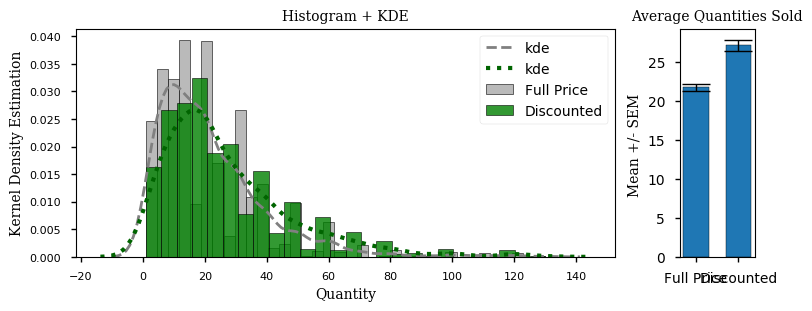

In [31]:
figa,ax = plot_wide_kde_thin_bar(df_fullprice['Quantity'],'Full Price',df_discounted['Quantity'],'Discounted')

In [0]:
# df_discounted.to_csv('df_discounted.csv')
# df_fullprice.to_csv('df_fullprice.csv')

In [33]:
df_fullprice.info(), df_discounted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 2154
Data columns (total 19 columns):
Id                1317 non-null object
OrderId           1317 non-null int64
ProductId         1317 non-null int64
UnitPrice         1317 non-null float64
Quantity          1317 non-null int64
Discount          1317 non-null float64
CustomerId        1317 non-null object
EmployeeId        1317 non-null int64
OrderDate         1317 non-null object
RequiredDate      1317 non-null object
ShippedDate       1279 non-null object
ShipVia           1317 non-null int64
Freight           1317 non-null float64
ShipName          1317 non-null object
ShipAddress       1317 non-null object
ShipCity          1317 non-null object
ShipRegion        1317 non-null object
ShipPostalCode    1297 non-null object
ShipCountry       1317 non-null object
dtypes: float64(3), int64(5), object(11)
memory usage: 205.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 6 to 2152
Data columns (to

(None, None)

## ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```
2. **Test for Homogeneity of Variance**
    - Levene's Test<br>
     ```scipy.stats.levene```

3. **Choose appropriate test based upon 1. and 2.** 
___

### Aim 2.1. Test for Normality

#### Prelminary Testing for Normality 

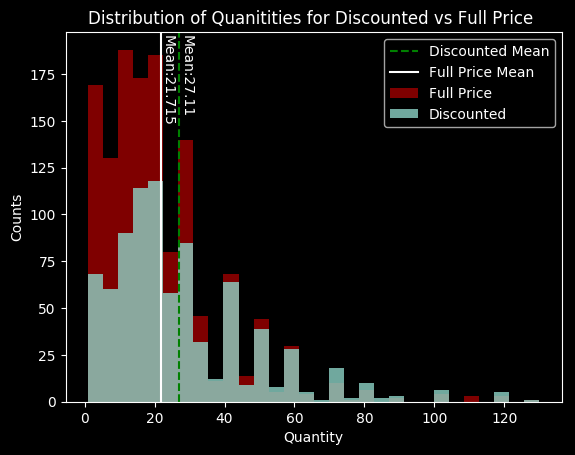

In [34]:
# Plot the re-sampled data

# # IF want to take smaller sample from population:

# pop_samp_disc = np.random.choice(pop_samp_disc,1000)
# pop_samp_full = np.random.choice(pop_samp_full, 1000)
with plt.style.context(('dark_background')):
    
    fig = plt.figure()
    plt.title('Distribution of Quanitities for Discounted vs Full Price ')

    disc = df_discounted['Quantity']
    full = df_fullprice['Quantity']
    
    
    plt.hist(full,color='red', alpha = 0.5, bins=30,label='Full Price')
    plt.hist(disc, alpha = 0.8, bins=30,label='Discounted')

    # Adding annotations
    meanD = round(np.mean(disc),3)
    meanF = round(np.mean(full),3)
    
    plt.axvline(meanD, color='green',linestyle='--',label='Discounted Mean')
    plt.text(meanD,190,f'Mean:{meanD}',rotation=270,fontweight='medium')
    
    plt.axvline(meanF,color='white',linestyle='-',label='Full Price Mean')
    plt.text(meanF, 190, f'Mean:{meanF}',rotation=270,fontweight='medium')

    plt.xlabel('Quantity')
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

# Run normality testing
# stat,p = normaltest(pop_samp_full)
# print(f'Normality: stat ={stat}, p = {p}')

# Run ttest
# tstat,tp = stats.ttest_ind(pop_samp_disc, pop_samp_full)
# print(f'T-test: stat ={tstat}, p = {tp}')#tstat,tp
# ax.text(

In [35]:
# D'Agonstino Pearson Normality Test
from scipy.stats import normaltest 
# Create results container list
results_normtest = [['DataIn','stat','p']]

# Perform Normality Test - Discounted
stat, p = normaltest(df_discounted['Quantity'])
results_normtest.append(['Discounted',stat,p])
print(f'Discounted: p ={p}, stat ={stat}')

# Perform Normality Test - Full Price
stat, p = normaltest(df_fullprice['Quantity'])
results_normtest.append(['Fullprice',stat,p])

print(f'Fullprice: p ={p}, stat ={stat}')
list2df(results_normtest)

Discounted: p =1.6214878452829618e-57, stat =261.528012299789
Fullprice: p =5.579637380545965e-119, stat =544.5770045551502


,DataIn,stat,p
0,Discounted,261.528012,1.621488e-57
1,Fullprice,544.577005,5.579637e-119


**Notes on Preliminary Normality Test:**
- Both groups failed assumption of normality. 

    - Let's compare normaltest vs shapiro test
    
- Let's try removing outliers with previously define detect_outliers

#### def normtest_results

In [0]:
def normtest_results(dict_data):
    """Peforms both d'agostino-pearson and shapiro-wilik normal tests
        
        Parameters:
            dict_data -- dictionary with {'name' : data} 
        Returns:
            results_normtest -- list of test results (can run list2df(results_normtest)
    """
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import shapiro
    from scipy.stats import normaltest

    results_normtest_shap = [['DataIn','Test','stat','p']]
    results_normtest_dagp = [['DataIn','Test','stat','p']]

    for key,val in dict_data.items():

        data_in = val
        name = key
        test = 'Shapiro'
        stat, p = shapiro(data_in)
        results_normtest_shap.append([name , test, stat , p ])
        test = 'D’Agostino’s'
        stat, p = normaltest(data_in)
        results_normtest_dagp.append([name,test,stat, p])

    results_normtest = pd.concat([list2df(results_normtest_shap), list2df(results_normtest_dagp)]) 

    return results_normtest #, list2df(results_normtest_shap),list2df(results_normtest_dagp)

#   results_pivot = results.pivot(index='DataIn', columns= 'Test')
#   results_pivot.stack(0)

### Sub-Aim 2.1.1 Use detect_outliers to remove outliers re-run normality tests

##### Run detect_outliers on df_discounted, df_fullprice, examine stats of outliers, and then test normality with cleaned data.

In [37]:
# Detect outliers in df_discounted
outlier_disc = detect_outliers(df_discounted,0,['Quantity'])

print(f'\nDescriptive Stats for Discounted Outliers:')
print(f'There are {len(outlier_disc)} outliers out of {len(df)} = {len(outlier_disc)/len(df)*100} %')
df[['Quantity','Discount']].iloc[outlier_disc].describe().round()


Descriptive Stats for Discounted Outliers:
There are 29 outliers out of 2155 = 1.345707656612529 %


,Quantity,Discount
count,29.0,29.0
mean,94.0,0.0
std,17.0,0.0
min,77.0,0.0
25%,80.0,0.0
50%,90.0,0.0
75%,100.0,0.0
max,130.0,0.0


In [38]:
# Detect outliers in df_fullprice
outlier_no_disc = detect_outliers(df_fullprice,0,['Quantity'])
print(f'\nDescriptive Stats for Fullprice Outliers:')
print(f'There are {len(outlier_no_disc)} outliers out of {len(df)} = {len(outlier_no_disc)/len(df)*100}%')
df[['Quantity','Discount']].iloc[outlier_no_disc].describe().round()


Descriptive Stats for Fullprice Outliers:
There are 34 outliers out of 2155 = 1.5777262180974478%


,Quantity,Discount
count,34.0,34.0
mean,86.0,0.0
std,20.0,0.0
min,63.0,0.0
25%,70.0,0.0
50%,80.0,0.0
75%,100.0,0.0
max,130.0,0.0


#### Remove outliers and re-run normality testing

In [39]:
# Indices were from original dataframe still, so dorp outliers from a copy of that 
df_to_clean = df.copy()

# Fill Data to Remove with np.nan
remove_label = ['outlier_disc' , 'outlier_no_disc']
remove_data = [outlier_disc , outlier_no_disc]

remove_me = dict(zip(remove_label, remove_data))

# Loop and replace indices of outliers with np.nan 
for key,val in remove_me.items():
    
    df_to_clean.iloc[val]=np.nan
    
    print(f'{key} removed {len(val)} outliers')

print('After removal:')
print(df_to_clean.isna().sum())

outlier_disc removed 29 outliers
outlier_no_disc removed 34 outliers
After removal:
Id                 63
OrderId            63
ProductId          63
UnitPrice          63
Quantity           63
Discount           63
CustomerId         63
EmployeeId         63
OrderDate          63
RequiredDate       63
ShippedDate       134
ShipVia            63
Freight            63
ShipName           63
ShipAddress        63
ShipCity           63
ShipRegion         63
ShipPostalCode    114
ShipCountry        63
dtype: int64


In [40]:
# Replace na and run stattest 
df_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 19 columns):
Id                2092 non-null object
OrderId           2092 non-null float64
ProductId         2092 non-null float64
UnitPrice         2092 non-null float64
Quantity          2092 non-null float64
Discount          2092 non-null float64
CustomerId        2092 non-null object
EmployeeId        2092 non-null float64
OrderDate         2092 non-null object
RequiredDate      2092 non-null object
ShippedDate       2021 non-null object
ShipVia           2092 non-null float64
Freight           2092 non-null float64
ShipName          2092 non-null object
ShipAddress       2092 non-null object
ShipCity          2092 non-null object
ShipRegion        2092 non-null object
ShipPostalCode    2041 non-null object
ShipCountry       2092 non-null object
dtypes: float64(8), object(11)
memory usage: 336.7+ KB


In [41]:
# pause
df_clean = df_to_clean.dropna(axis=0)#,inplace=True)
df_clean.info(),print(f'\n\nOutliers present:'),df_clean.isna().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2110
Data columns (total 19 columns):
Id                1970 non-null object
OrderId           1970 non-null float64
ProductId         1970 non-null float64
UnitPrice         1970 non-null float64
Quantity          1970 non-null float64
Discount          1970 non-null float64
CustomerId        1970 non-null object
EmployeeId        1970 non-null float64
OrderDate         1970 non-null object
RequiredDate      1970 non-null object
ShippedDate       1970 non-null object
ShipVia           1970 non-null float64
Freight           1970 non-null float64
ShipName          1970 non-null object
ShipAddress       1970 non-null object
ShipCity          1970 non-null object
ShipRegion        1970 non-null object
ShipPostalCode    1970 non-null object
ShipCountry       1970 non-null object
dtypes: float64(8), object(11)
memory usage: 307.8+ KB


Outliers present:


(None, None, Id                False
 OrderId           False
 ProductId         False
 UnitPrice         False
 Quantity          False
 Discount          False
 CustomerId        False
 EmployeeId        False
 OrderDate         False
 RequiredDate      False
 ShippedDate       False
 ShipVia           False
 Freight           False
 ShipName          False
 ShipAddress       False
 ShipCity          False
 ShipRegion        False
 ShipPostalCode    False
 ShipCountry       False
 dtype: bool)

#### Separate Back into Discounted and Fullprice Dataframes  

In [0]:
# Separate Back into Discounted and Fullprice Dataframes  

# Building data_in dictionary for normtest_results
df_disc_orig = df_discounted
df_full_orig = df_fullprice

df_discounted_clean = df_clean.loc[df_clean['Discount']>0].copy()
# df_discounted_clean.info()
df_fullprice_clean = df_clean.loc[df_clean['Discount']==0].copy()
# df_fullprice_clean.info()

In [0]:
# Combine all data into 1 dictionary for normtest_results.
data_in = {}

data_in['Disc, Orig'] = df_disc_orig['Quantity']
data_in['Disc, Clean'] = df_discounted_clean['Quantity']

data_in['Full Price','Orig'] = df_full_orig['Quantity']
data_in['Full Price','Clean'] = df_fullprice_clean['Quantity']

In [44]:
# Run normtest_results on combined dataset.
results = normtest_results(data_in) #[0]
results.set_index('DataIn')

,Test,stat,p
DataIn,,,
"Disc, Orig",Shapiro,0.869030,6.881204e-26
"Disc, Clean",Shapiro,0.920683,2.661152e-19
"(Full Price, Orig)",Shapiro,0.843457,3.803857e-34
"(Full Price, Clean)",Shapiro,0.916697,1.902830e-25
"Disc, Orig",D’Agostino’s,261.528012,1.621488e-57
"Disc, Clean",D’Agostino’s,80.420078,3.443515e-18
"(Full Price, Orig)",D’Agostino’s,544.577005,5.579637e-119
"(Full Price, Clean)",D’Agostino’s,140.845598,2.604756e-31


**Notes re: removing outliers with detect_outliers.**
- Still getting significant results for normality testing. 
- Attempting 1 more method of outlier removal -- QuantileTransformer<br>
```from sklearn.preprocessing import QuantileTransformer```

### Sub-Aim 2.1.2 Use QuantileTransformer to attempt to meet the assumption of normality.

#### def quant_transform 

In [0]:
# TRANSFORM DATA BEFORE RE-CALLING ORIGINAL normtest_results
def quant_transform(data_in):
    '''Use sklearn.preprocessing.QuantileTransformer to remove outliers from dataset.
    
    Parameters:
        data_in (dict) -- dictionary with data series as values to be processed.
    Returns: 
        data_tf (dict) -- dicionary of same keys from data_in, but transformed.
        '''
    
    from sklearn import preprocessing as prep 
    from sklearn.preprocessing import QuantileTransformer

    qt =  QuantileTransformer(n_quantiles=10,output_distribution='normal')
    data_tf = {}
    for k,v in data_in.items():    
        data = np.array(v).reshape(-1,1)
        transformed = pd.Series(np.squeeze(qt.fit_transform(data)))
      
        data_tf[k] = transformed
    
    return data_tf

In [46]:
# Run data_in through quant_transform to get data_tf
data_tf = quant_transform(data_in)

# Run transformed data through normtest_results.
trans_norm_test = normtest_results(data_tf)#[0]
trans_norm_test

,DataIn,Test,stat,p
0,"Disc, Orig",Shapiro,0.955760,3.409909e-15
1,"Disc, Clean",Shapiro,0.855450,1.641324e-25
2,"(Full Price, Orig)",Shapiro,0.919123,5.725075e-26
3,"(Full Price, Clean)",Shapiro,0.859803,1.033370e-31
0,"Disc, Orig",D’Agostino’s,103.590493,3.203393e-23
1,"Disc, Clean",D’Agostino’s,110.340329,1.096231e-24
2,"(Full Price, Orig)",D’Agostino’s,317.579615,1.092604e-69
3,"(Full Price, Clean)",D’Agostino’s,327.579515,7.362276e-72


In [0]:
# dataDict = {'Original':data_in,'Transformed':data_in_tf }
# # df_data = normtest_results(data_in)[0]
# dataDict_results = {'Original-Results':normtest_results(data_in),'Transformed-Results': normtest_results(data_in_tf)}

In [0]:
# # Display info for 
# printDict=dataDict
# print(f'dataDict')

# for key, val in printDict.items():
#   print(key)
#   for k, v in printDict[key].items():
#     print(f'   {k}\n         has {len(v)} values with mean={np.mean(v)}')


### Sub-Aim 2.1.3 Use resampling to get a normal distribution from the data and re-run normality tests.

In [0]:
data_discounted = df['Quantity'].loc[df['Discount']>0].copy()
data_fullprice = df['Quantity'].loc[df['Discount']==0].copy()

In [0]:
# Resample our data  i # of samples with n =50/sample 
n = 50 
i = 10000
pop_samp_disc = []
pop_samp_full = []
for i in range(0,i):
    
    pop_samp_disc.append(data_discounted.sample(n).mean())
    pop_samp_full.append(data_fullprice.sample(n).mean())
    #   test_results.append(normaltest())
    # plt.hist([pop_samp_disc,pop_samp_full])

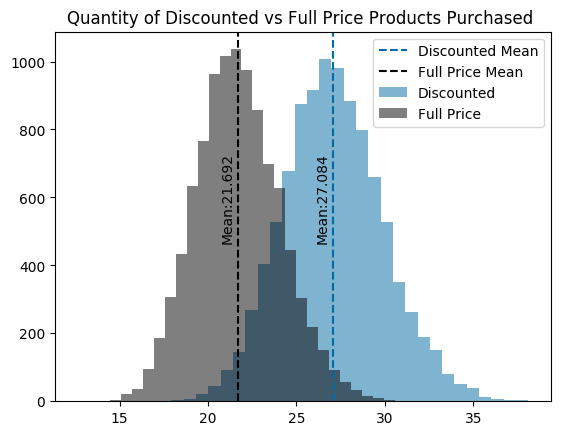

Normality: stat =84.8885831950964, p = 3.6870444289372017e-19


In [50]:
# Plot the re-sampled data

# # IF want to take smaller sample from population:

# pop_samp_disc = np.random.choice(pop_samp_disc,1000)
# pop_samp_full = np.random.choice(pop_samp_full, 1000)
with plt.style.context(('tableau-colorblind10')):
    fig = plt.figure()
    
    plt.title('Quantity of Discounted vs Full Price Products Purchased ')
    
    plt.hist(pop_samp_disc,alpha = 0.5, bins=30,label='Discounted')
    plt.hist(pop_samp_full,color='black', alpha = 0.5, bins=30,label='Full Price')

    # Adding annotations
    meanD = round(np.mean(pop_samp_disc),3)
    meanS = round(np.mean(pop_samp_full),3)
    
    plt.axvline(meanD, linestyle='--',label='Discounted Mean')
    plt.text(meanD-1,700,f'Mean:{meanD}',rotation=90)
    
    plt.axvline(meanS,color='k',linestyle='--',label='Full Price Mean')
    plt.text(meanS-1,700,f'Mean:{meanS}',rotation=90)


    plt.legend()
    plt.show()

# Run normality testing
stat,p = normaltest(pop_samp_full)
print(f'Normality: stat ={stat}, p = {p}')

# Run ttest
tstat,tp = stats.ttest_ind(pop_samp_disc, pop_samp_full)
# print(f'T-test: stat ={tstat}, p = {tp}')#tstat,tp
# ax.text(

## ***Aim 2 _final version_ : Run final workflow for testing assumptions***

#### New Statistical Analysis Pipeline
**Don't forget about the codeacademy slides, [the tukey test they recommend is not from scipy, its from statsmodels]**(https://drive.google.com/drive/u/0/folders/18OI7pC76d6IJ5xI0ZA8A__Da9WI2rNon)
1. Separate data into groups
2. test groups for normality 
    - [Normaltest/ D’Agostino and Pearson’s](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

3. test groups for homo of variance
    - [Levene's Test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html)
4. Try to normalize data if possible?
    - 
5. Choose test based on output
    - Normal: 2 sample t-test
    - Welch's t-test (Jeff)
    - Not normal =     - [Mann Whitney U Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
5B. Calculate other statistics for result, i.e effect size...?
    - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
6. Run test, if significant follow up with post-hoc tests (IF have more than 2 groups)
    - [Tukey's](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)


In [51]:
# 1 - Separating groups from dfH (dataframeHypothesis)
dfH = df[['Quantity','UnitPrice','Discount']].copy()

#Adding group definitions
grpA = "['Discount'] > 0"
grpB = "['Discount'] == 0"

# Using eval to create df_A and df_B; will allow us to fill in our results 
# with the exact definitions of Group A and Group B
df_A = eval(f'dfH.loc[dfH{grpA}]')
df_B = eval(f'dfH.loc[dfH{grpB}]')

# dfj_D = dfH.loc[dfj['Discount']>0] 
# dfj_F = dfH.loc[dfj['Discount']==0]
df_A.describe(),'--'*25,df_B.describe()

(         Quantity   UnitPrice    Discount
 count  838.000000  838.000000  838.000000
 mean    27.109785   26.292363    0.144439
 std     20.771439   30.017214    0.071808
 min      1.000000    2.000000    0.010000
 25%     12.000000   12.500000    0.100000
 50%     20.000000   18.000000    0.150000
 75%     36.000000   31.230000    0.200000
 max    130.000000  263.500000    0.250000,
 '--------------------------------------------------',
           Quantity    UnitPrice  Discount
 count  1317.000000  1317.000000    1317.0
 mean     21.715262    26.171534       0.0
 std      17.507493    29.717354       0.0
 min       1.000000     2.000000       0.0
 25%      10.000000    12.000000       0.0
 50%      18.000000    18.400000       0.0
 75%      30.000000    32.800000       0.0
 max     130.000000   263.500000       0.0)

### Aim 2.1: Test for Normality

In [0]:
# Adding table to collect summary statistics
H1_tests = [['Group:','TestName','Test Purpose','stat','p']  ]

In [53]:
# H1_tests = [['Group:','TestName','Test Purpose','stat','p']  ]
# 2. Testing normality

test_purpose = 'Normality'
test_to_run = 'normaltest'

arrA = np.array(df_A['Quantity'])
arrB = np.array(df_B['Quantity'])

statA, pA = eval(test_to_run)(arrA)
statB, pB = eval(test_to_run)(arrB)

print(f'A:stat={statA}, p={pA}')
print(f'B:stat={statB}, p={pB}')

# H1_tests = [['Group:','TestName','Test Purpose','stat','p']  ]
H1_tests.append(['A: '+grpA,test_to_run,test_purpose,statA,pA])
H1_tests.append(['B: '+grpB,test_to_run,test_purpose,statB,pB])
# list2df(H1_tests)

A:stat=261.528012299789, p=1.6214878452829618e-57
B:stat=544.5770045551502, p=5.579637380545965e-119


In [54]:
list2df(H1_tests).round(4)

,Group:,TestName,Test Purpose,stat,p
0,A: ['Discount'] > 0,normaltest,Normality,261.528,0.0
1,B: ['Discount'] == 0,normaltest,Normality,544.577,0.0


### Aim 2.2 Test for Homogeneity of Variance

In [0]:
# 3. Test for homo var
test_to_run = 'stats.levene'
stat,p = eval(test_to_run)(arrA,arrB,center='median')

H1_tests.append(['A&B',test_to_run,'Equal Var',stat,p])

### Aim 2.3 Selecting the appropriate test to perform.

In [56]:
list2df(H1_tests)

,Group:,TestName,Test Purpose,stat,p
0,A: ['Discount'] > 0,normaltest,Normality,261.528012,1.621488e-57
1,B: ['Discount'] == 0,normaltest,Normality,544.577005,5.579637e-119
2,A&B,stats.levene,Equal Var,14.832672,1.209138e-04


### Conclusions so far...
- We failed both normaltests and homo variance
- Need non-parametric 2sample ttest
    - [**Mann-Whitney U test**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

In [0]:
#### Mann-Whitney U test

In [0]:
# Mann Whitney U test+
import scipy.stats as stats
# arrA was discounted, arrB was non-discounted
test_to_run = 'stats.mannwhitneyu'
stat, p = eval(test_to_run)(arrA,arrB,alternative='greater')
stat, p
H1_tests.append(['A vs. B',test_to_run, 'H1_sig', stat,p])

In [0]:
list2df(H1_tests).round(4).to_csv('H1_tests_MWU.csv')
# list2df(H1_tests)

### TESTING TABLE METHODS

In [60]:
df_table= list2df(H1_tests).round(4)
# dfH1_table.round(4).to_html('table.html')
from IPython.display import display
display(df_table)

,Group:,TestName,Test Purpose,stat,p
0,A: ['Discount'] > 0,normaltest,Normality,261.5280,0.0000
1,B: ['Discount'] == 0,normaltest,Normality,544.5770,0.0000
2,A&B,stats.levene,Equal Var,14.8327,0.0001
3,A vs. B,stats.mannwhitneyu,H1_sig,642105.0000,0.0000


In [0]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from pandas.tools.plotting import table
# ax = plt.subplot(111,frame_on=False)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

# table(ax, list2df(H1_tests))

#### Calculating Effect Size

In [62]:
# Calculating Cohens d
d = Cohen_d(arrA,arrB)
print(f"Cohen's d={round(d,3)}")

Cohen's d=0.286


**We have a significant Mann Whitney U results, but we have yet to say anything about**

- We should now run post-hoc tests using pairwise Tukey's tests 
- Maybe best to run them so that the full price group is run vs the levels of discount pairwise (But not to test pairwise within the levels of discounts)

## ***Aim 3: To perform post-hoc pairwise comparisons for level of discount***

In [63]:
pd.DataFrame(df['Discount'].value_counts().sort_index())

,Discount
0.00,1317
0.01,1
0.02,2
0.03,3
0.04,1
0.05,185
0.06,1
0.10,173
0.15,157
0.20,161


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 19 columns):
Id                2155 non-null object
OrderId           2155 non-null int64
ProductId         2155 non-null int64
UnitPrice         2155 non-null float64
Quantity          2155 non-null int64
Discount          2155 non-null float64
CustomerId        2155 non-null object
EmployeeId        2155 non-null int64
OrderDate         2155 non-null object
RequiredDate      2155 non-null object
ShippedDate       2082 non-null object
ShipVia           2155 non-null int64
Freight           2155 non-null float64
ShipName          2155 non-null object
ShipAddress       2155 non-null object
ShipCity          2155 non-null object
ShipRegion        2155 non-null object
ShipPostalCode    2100 non-null object
ShipCountry       2155 non-null object
dtypes: float64(3), int64(5), object(11)
memory usage: 336.7+ KB


### Creating Discount Level Variables for Tukey
- Adding LabelEncoding
- Question: do we want to have "None" encoded? Not sure. Would need to replace the current np.NaN with "NaN" first or likely will return error

In [65]:
# intervalIndex = pd.IntervalIndex(())
df_cut = df.copy().drop('Discount',axis=1)

new_discounts = pd.cut(df['Discount'],[-0.05,0.0,0.05,0.10,0.15,0.20,0.25,0.3], include_lowest=False)
new_discouts = new_discounts.cat.as_ordered(inplace=True)
df_disc_codes  = new_discounts.cat.codes

# Save code info for later
disc_intervals = new_discounts.unique().sort_values()
disc_codes = sorted(df_disc_codes.unique())

# Save the intervals 
labelCodes = tuple(zip(disc_intervals,disc_codes))
labelCodes

((Interval(-0.05, 0.0, closed='right'), 0),
 (Interval(0.0, 0.05, closed='right'), 1),
 (Interval(0.05, 0.1, closed='right'), 2),
 (Interval(0.1, 0.15, closed='right'), 3),
 (Interval(0.15, 0.2, closed='right'), 4),
 (Interval(0.2, 0.25, closed='right'), 5))

In [66]:
# Before encoding
df_H1codes = pd.concat([df_cut,new_discounts,df_disc_codes],axis=1)
df_H1codes.head(10)

,Id,OrderId,ProductId,UnitPrice,Quantity,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Discount,0
0,10248/11,10248,11,14.0,12,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,"(-0.05, 0.0]",0
1,10248/42,10248,42,9.8,10,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,"(-0.05, 0.0]",0
2,10248/72,10248,72,34.8,5,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,"(-0.05, 0.0]",0
3,10249/14,10249,14,18.6,9,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,"(-0.05, 0.0]",0
4,10249/51,10249,51,42.4,40,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,"(-0.05, 0.0]",0
5,10250/41,10250,41,7.7,10,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,"(-0.05, 0.0]",0
6,10250/51,10250,51,42.4,35,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,"(0.1, 0.15]",3
7,10250/65,10250,65,16.8,15,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,"(0.1, 0.15]",3
8,10251/22,10251,22,16.8,6,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France,"(0.0, 0.05]",1
9,10251/57,10251,57,15.6,15,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France,"(0.0, 0.05]",1


In [67]:
colnames = list(df_H1codes.columns)
colnames[-1] = 'DiscSize'
df_H1codes.columns = colnames
df_H1codes.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Discount,DiscSize
0,10248/11,10248,11,14.0,12,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,"(-0.05, 0.0]",0
1,10248/42,10248,42,9.8,10,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,"(-0.05, 0.0]",0
2,10248/72,10248,72,34.8,5,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,"(-0.05, 0.0]",0
3,10249/14,10249,14,18.6,9,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,"(-0.05, 0.0]",0
4,10249/51,10249,51,42.4,40,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,"(-0.05, 0.0]",0


### Use Tukey's Pairwise Multiple Comparison test.
```statsmodels.stats.multicomp.pairwise_tukeyhsd```

In [68]:
# Importing tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey
int_str = [str(x) for x in new_discounts]

tukey_results =tukey(df_H1codes['Quantity'], int_str, 0.05)
print(tukey_results.summary())

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2   meandiff  lower   upper  reject
--------------------------------------------------------
(-0.05, 0.0] (0.0, 0.05]  5.3368   1.1841  9.4895  True 
(-0.05, 0.0] (0.05, 0.1]  3.3882  -0.9479  7.7243 False 
(-0.05, 0.0] (0.1, 0.15]  6.6669   2.1282 11.2056  True 
(-0.05, 0.0] (0.15, 0.2]  5.3096   0.8215  9.7977  True 
(-0.05, 0.0] (0.2, 0.25]  6.525    1.9469 11.1031  True 
(0.0, 0.05]  (0.05, 0.1] -1.9486  -7.5752  3.6779 False 
(0.0, 0.05]  (0.1, 0.15]  1.3301  -4.4541  7.1143 False 
(0.0, 0.05]  (0.15, 0.2] -0.0272  -5.7718  5.7173 False 
(0.0, 0.05]  (0.2, 0.25]  1.1882  -4.6269  7.0033 False 
(0.05, 0.1]  (0.1, 0.15]  3.2787  -2.6385  9.196  False 
(0.05, 0.1]  (0.15, 0.2]  1.9214  -3.9571  7.7999 False 
(0.05, 0.1]  (0.2, 0.25]  3.1368  -2.8106  9.0843 False 
(0.1, 0.15]  (0.15, 0.2] -1.3573  -7.3868  4.6722 False 
(0.1, 0.15]  (0.2, 0.25] -0.1419  -6.2387  5.9549 False 
(0.15, 0.2]  (0.2, 0.25]  1.215

In [69]:
# Save the results into a dataframe
dfH_tukey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
dfH_tukey.loc[dfH_tukey['reject']==True]

,group1,group2,meandiff,lower,upper,reject
0,"(-0.05, 0.0]","(0.0, 0.05]",5.3368,1.1841,9.4895,True
2,"(-0.05, 0.0]","(0.1, 0.15]",6.6669,2.1282,11.2056,True
3,"(-0.05, 0.0]","(0.15, 0.2]",5.3096,0.8215,9.7977,True
4,"(-0.05, 0.0]","(0.2, 0.25]",6.5250,1.9469,11.1031,True


## ***Conclusions for Hypothesis 1:***
1. **We first used D'Agostino & Perason's test (normaltest) to check for normal distributions**
    -  Both groups had p-values very far below our $\alpha=0.05$  (Rows 0,1 below)
        - We rejecteded the null hypothesis that the groups came from a populatiin with a normal distribtuion. 
2. **We tested for equal variances using Levene's test. **
    - Level's test had a signifcant p-value, so we rejected the hypothesis that the groups have equal variances
    
3. **We then concluded we need a non-parametric 2-sample test, so we used the Mann-Whitney U test**. 
    -  Our comparison had a p-value less than .05
    - We reject the null hypothesis that discounts do not affect quantities sold.



In [70]:

H1_tests_table = list2df(H1_tests)
H1_tests_table

,Group:,TestName,Test Purpose,stat,p
0,A: ['Discount'] > 0,normaltest,Normality,261.528012,1.621488e-57
1,B: ['Discount'] == 0,normaltest,Normality,544.577005,5.579637e-119
2,A&B,stats.levene,Equal Var,14.832672,1.209138e-04
3,A vs. B,stats.mannwhitneyu,H1_sig,642105.000000,6.629382e-11


4. **To determine which level of discounts had the largest effect, we performed a pairwise multiple comparison Tukey's test**. 
    - Our results showed that 
    

In [71]:
# Print JUST significant results
dfH_tukey.loc[dfH_tukey['group1'] =='(-0.05, 0.0]']

,group1,group2,meandiff,lower,upper,reject
0,"(-0.05, 0.0]","(0.0, 0.05]",5.3368,1.1841,9.4895,True
1,"(-0.05, 0.0]","(0.05, 0.1]",3.3882,-0.9479,7.7243,False
2,"(-0.05, 0.0]","(0.1, 0.15]",6.6669,2.1282,11.2056,True
3,"(-0.05, 0.0]","(0.15, 0.2]",5.3096,0.8215,9.7977,True
4,"(-0.05, 0.0]","(0.2, 0.25]",6.5250,1.9469,11.1031,True


In [0]:
# Save results to new dataframe
df_orig_save = df.copy()
dfH1_save = dfH.copy()

___
# **Hypothesis 2:**


$H_1$: Customers spend more money on orders when they are buying discounted items.


$H_0$: Customers spend the same amount regardless of discounted items. 

**Specific Aims:**

* ***Aim 1:To select the proper dataset for analysis, perform EDA, and generate data groups for testing.***
    - Used sqlalchemy and pandas.read_sql_query()
    ```query = "SELECT* FROM OrderDetails,
            GROUPBY discount```

* ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
    1. **Test for Normality**
        - D'Agostino-Pearson's normality test<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```
    2. **Test for Homogeneity of Variance**
        - Levene's Test<br>
         ```scipy.stats.levene```

    3. **Choose appropriate test based upon 1. and 2.** <br> 
    
    
* ***Aim 3: To perform post-hoc painrwise comparison testing to determine which level of discounts affect quantity and if any discount has a greater effect than the others.***

     - Tukey's test for multiple pairwise comparisons

_________
## ***Aim 1 : To select the proper dataset for analysis  and generate data groups for testing.***

#### Importing Method
- Use sqlalchemy to create engine to connect to Northwind_small.sqlite.
- use pd.read_sql_query('SELECT * FROM OrderDetail',egine) to directly read db into df

In [73]:
filepath = '/content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite'
# filepath = 'Northwind_small.sqlite'
#-------------------
# Testing minimal version of prior code
import sqlite3
from sqlalchemy import create_engine, inspect
# from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey,text, Float

engine = create_engine('sqlite:///'+filepath,echo=True);
inspector = inspect(engine);
db_tables = inspector.get_table_names();
print('\n',db_tables);

2019-04-07 20:51:06,134 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-07 20:51:06,135 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:06,138 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-07 20:51:06,139 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:06,146 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-07 20:51:06,148 INFO sqlalchemy.engine.base.Engine ()

 ['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [74]:
# We want to test hypothesis one, so we need OrderDetail table.
table_to_test = "OrderDetail"
df = pd.read_sql_query("SELECT * FROM OrderDetail",  engine)
df.head()

2019-04-07 20:51:06,169 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-04-07 20:51:06,171 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


### Aim 1.1: Calculating order totals, adding discount groups

In [75]:
# Source of df = pd.read_sql_query("SELECT * FROM OrderDetail",  engine)

# Define calc_product_review to add product price column
def calc_product_price(row):
    price = row['UnitPrice']*(1-row['Discount'])*row['Quantity']
    row['price'] = price
    if row['Discount']>0:
        row['OnSale'] = 1
    else:
        row['OnSale'] = 0
    return row    

# Use calc_order_total to fill in order_total column
def calc_order_total(row,df):
    order = row['OrderId']
    df_temp = df.groupby('OrderId').get_group(order)

    
    if any(df_temp['OnSale']):
        row['discounted_order'] = 1
    else:
        row['discounted_order'] = 0
    
    order_total = df_temp['price'].sum()
    row['order_total'] = order_total
    
    return row
# Apply calc_product_price to every row 
df_price = df.apply(lambda x: calc_product_price(x),axis=1)
# df_price['order_total'] = None


# Apply_calc_order_total to every row
df_price = df_price.apply(lambda x: calc_order_total(x,df_price), axis=1)  
df_price.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,price,OnSale,discounted_order,order_total
0,10248/11,10248,11,14.0,12,0.0,168.0,0,0,440.0
1,10248/42,10248,42,9.8,10,0.0,98.0,0,0,440.0
2,10248/72,10248,72,34.8,5,0.0,174.0,0,0,440.0
3,10249/14,10249,14,18.6,9,0.0,167.4,0,0,1863.4
4,10249/51,10249,51,42.4,40,0.0,1696.0,0,0,1863.4


In [0]:
df_export= df_price.copy().reset_index()
# df_export['OnSale'].loc[df_export['OnSale']==False] = 0
# df_export['OnSale'].loc[df_export['OnSale']==True] = 1

# df_export['discounted_order'].loc[df_export['discounted_order']==False] = 0
# df_export['discounted_order'].loc[df_export['discounted_order']==True] = 1

# df_export.describe().round()
# df_expo
# df_export.to_csv('hypothesis_1_to_plot.csv')


df_export.to_csv('For Tableau- join_order_details_calc_total.csv')
df_export.to_excel('For Tableau- join_order_details_calc_total.xlsx')

## BOOKMARK: REPLACE FIGURE

### def plot_wide_kde_mean_sem_bar()

<Figure size 800x550 with 0 Axes>

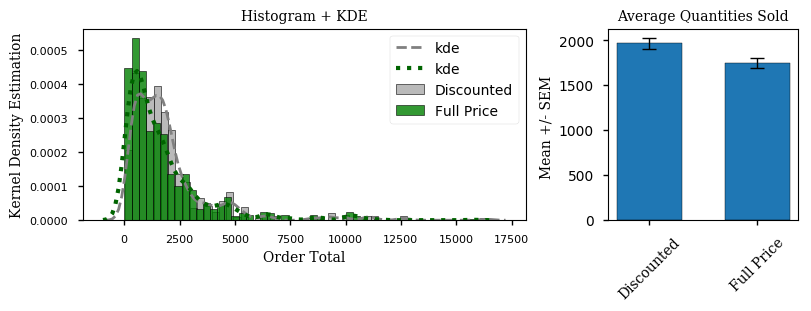

In [151]:
def plot_wide_kde_thin_bar(series1,sname1, series2, sname2):
    '''Plot series1 and series 2 on wide kde plot with small mean+sem bar plot.'''
    
    ## ADDING add_gridspec usage
    import pandas as pd
    import numpy as np
    from scipy.stats import sem

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import matplotlib.ticker as ticker
    %matplotlib inline

    import seaborn as sns

    from matplotlib import rcParams
    from matplotlib import rc
    rcParams['font.family'] = 'serif'
    plt.rcParams["axes.edgecolor"] = "black"




    # Plot distributions of discounted vs full price groups
    plt.style.use('default')
    # with plt.style.context(('tableau-colorblind10')):
    with plt.style.context(('seaborn-notebook')):

        

        ## ----------- DEFINE AESTHETIC CUSTOMIZATIONS ----------- ##
       # Axis Label fonts
        fontSuptitle ={'fontsize': 22,
                   'fontweight': 'bold',
                    'fontfamily':'serif'}

        fontTitle = {'fontsize': 10,
                   'fontweight': 'medium',
                    'fontfamily':'serif'}

        fontAxis = {'fontsize': 10,
                   'fontweight': 'medium',
                    'fontfamily':'serif'}

        fontTicks = {'fontsize': 8,
                   'fontweight':'medium', 
                    'fontfamily':'serif'}


        ## --------- CREATE FIG BASED ON GRIDSPEC --------- ##
        
        plt.suptitle('Quantity of Units Sold', fontdict = fontSuptitle)

        # Create fig object and declare figsize
        fig = plt.figure(constrained_layout=True, figsize=(8,3))
        
        
        # Define gridspec to create grid coordinates             
        gs = fig.add_gridspec(nrows=1,ncols=10)

        # Assign grid space to ax with add_subplot
        ax0 = fig.add_subplot(gs[0,0:7])
        ax1 = fig.add_subplot(gs[0,7:10])
        
        #Combine into 1 list
        ax = [ax0,ax1]
        
        ### ------------------  SUBPLOT 1  ------------------ ###

        ## --------- Defining series1 and 2 for subplot 1------- ##
        ax[0].set_title('Histogram + KDE',fontdict=fontTitle)

        # Group 1: data, label, hist_kws and kde_kws
        plotS1 = {'data': series1, 'label': sname1.title(),

                   'hist_kws' :
                    {'edgecolor': 'black', 'color':'darkgray','alpha': 0.8, 'lw':0.5},

                   'kde_kws':
                    {'color':'gray', 'linestyle': '--', 'linewidth':2,
                     'label':'kde'}}

        # Group 2: data, label, hist_kws and kde_kws
        plotS2 = {'data': series2,
                    'label': sname2.title(), 

                    'hist_kws' :
                    {'edgecolor': 'black','color':'green','alpha':0.8 ,'lw':0.5},


                    'kde_kws':
                    {'color':'darkgreen','linestyle':':','linewidth':3,'label':'kde'}}
        
        # plot group 1
        sns.distplot(plotS1['data'], label=plotS1['label'],
                   
                     hist_kws = plotS1['hist_kws'], kde_kws = plotS1['kde_kws'],
                     
                     ax=ax[0])   
      

        # plot group 2
        sns.distplot(plotS2['data'], label=plotS2['label'],
                     
                     hist_kws=plotS2['hist_kws'], kde_kws = plotS2['kde_kws'],
                     
                     ax=ax[0])

        # X label
        xlabel = series1.name
        xl = xlabel.replace('_',' ').title()
        ax[0].set_xlabel(xl,fontdict=fontAxis)
        ax[0].set_ylabel('Kernel Density Estimation',fontdict=fontAxis)
        # ticks/legend
        ax[0].tick_params(axis='both',labelsize=fontTicks['fontsize'])   
        ax[0].legend()


        
        
        ### ------------------  SUBPLOT 2  ------------------ ###
        
        # Import scipy for error bars
        from scipy.stats import sem
    
        # Declare x y group labels(x) and bar heights(y)
        x = [plotS1['label'], plotS2['label']]
        y = [np.mean(plotS1['data']), np.mean(plotS2['data'])]

        yerr = [sem(plotS1['data']), sem(plotS2['data'])]
        err_kws = {'ecolor':'black','capsize':5,'capthick':1,'elinewidth':1}

        # Create the bar plot
        ax[1].bar(x,y,align='center', edgecolor='black', yerr=yerr,error_kw=err_kws,width=0.6)

        
        # Customize subplot 2
        ax[1].set_title('Average Quantities Sold',fontdict=fontTitle)
        ax[1].set_ylabel('Mean +/- SEM ',fontdict=fontAxis)
        ax[1].set_xlabel('')
        
        ax[1].tick_params(axis=y,labelsize=fontTicks['fontsize'])
        ax[1].tick_params(axis=x,labelsize=fontTicks['fontsize']) 

        ax1=ax[1]
        test = ax1.get_xticklabels()
        labels = [x.get_text() for x in test]
        ax1.set_xticklabels([plotS1['label'],plotS2['label']], rotation=45,ha='center',fontdict=fontAxis)
        
        
#         plt.tight_layout()
        plt.show()
        return fig,ax
    
    

# Define groups
# A: discounted df_price.groupby('discounted_order').get_group(1)
# B: full price df_price.groupbt('discounted_order').get_group(0)
grpA = df_price.groupby('discounted_order').get_group(1)
grpB = df_price.groupby('discounted_order').get_group(0)


fig, ax =plot_wide_kde_thin_bar(grpA['order_total'],'Discounted',grpB['order_total'],'Full Price')
fig.savefig('H1_EDA_using_gridspec.png')


In [154]:
import matplotlib as mpl
mpl.get_configdir()


'/root/.config/matplotlib'

In [148]:
# # ax = fig.get_axes()
# # xlabel = ax[0].get_xlabel()

# # xl = xlabel.replace('_',' ').title()
# # print(xl)

# box = fig.get_clip_box()
# print(box)


None


### Aim 1.2: EDA on dataset 


<Figure size 800x550 with 0 Axes>

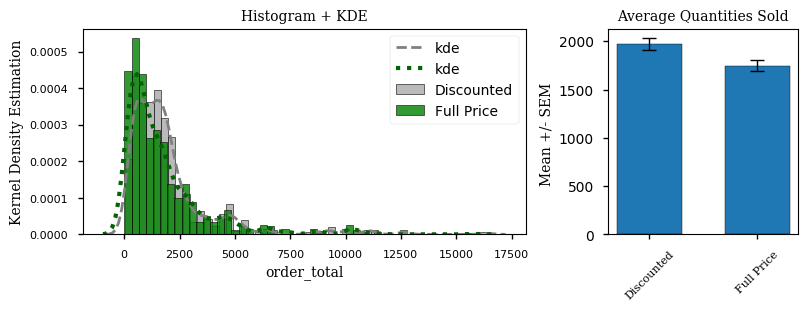

In [130]:
import warnings
warnings.filterwarnings("ignore")
# Define groups
# A: discounted df_price.groupby('discounted_order').get_group(1)
# B: full price df_price.groupbt('discounted_order').get_group(0)
grpA = df_price.groupby('discounted_order').get_group(1)
grpB = df_price.groupby('discounted_order').get_group(0)


fig, ax =plot_wide_kde_thin_bar(grpA['order_total'],'Discounted',grpB['order_total'],'Full Price')


['Discounted', 'Full Price']


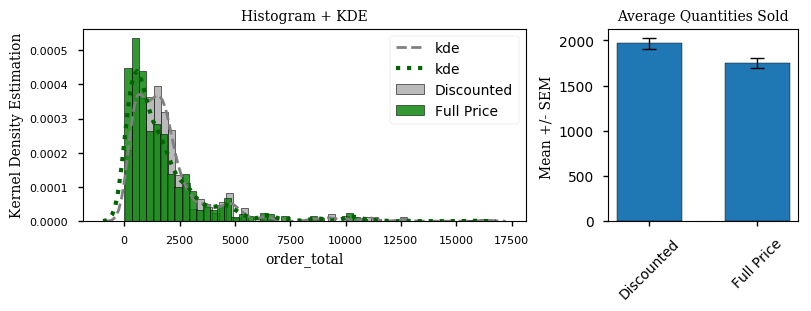

In [79]:


test = ax[1].get_xticklabels()
labels = [x.get_text() for x in test]
ax[1].set_xticklabels(labels,rotation=45)
print(labels)
# fig.tight_layout()
# fig.get_constrained_layout_pads
# test = ax[1].xaxis.get_ticklabels()
# print(test[0].get_text())

# fig.get_axes
# ax= fig.get_axes()
# # fig.patch()
# xax = ax[1].xaxis
# xax.get_label()

fig

<!-- ## Aim 1.3: Generate and inspect required groups  -->

In [80]:
# 1 - Separating groups from dfH (dataframeHypothesis)
df_temp = df_price[['OrderId','order_total','discounted_order']]

unique_orders = df_temp['OrderId'].unique()

len(unique_orders)
keep_me=[['OrderId','order_total','discounted_order']]

for u in unique_orders:
#     grouped = dfH.groupby('OrderId').get_group(u)
#     keep_me.append(grouped.iloc[0,:])
    grouped_idx = df_temp.groupby('OrderId').get_group(u).index
    keep_me.append(df_temp.loc[grouped_idx[0]])
dfH = list2df(keep_me)
dfH.head()

,OrderId,order_total,discounted_order
0,10248.0,440.00,0.0
3,10249.0,1863.40,0.0
5,10250.0,1552.60,1.0
8,10251.0,654.06,1.0
11,10252.0,3597.90,1.0


In [81]:
dfH[['order_total','discounted_order']].groupby('discounted_order').describe()#.stack()

order_total                                          \
                       count         mean          std   min     25%   
discounted_order                                                       
0.0                    450.0  1375.331844  1792.781223  12.5  360.25   
1.0                    380.0  1702.351867  1892.448163  23.8  587.75   

                                                
                         50%      75%      max  
discounted_order                                
0.0                810.25000  1731.67  15810.0  
1.0               1244.88525  2027.91  16387.5

In [82]:
#Adding group definitions
grpA = "['discounted_order'] == True"
grpB = "['discounted_order'] == False"

# Using eval to create df_A and df_B; will allow us to fill in our results 
# with the exact definitions of Group A and Group B
df_A = eval(f'dfH.loc[dfH{grpA}]')
df_B = eval(f'dfH.loc[dfH{grpB}]')

# dfj_D = dfH.loc[dfj['Discount']>0] 
# dfj_F = dfH.loc[dfj['Discount']==0]
df_A.describe(),'--'*25,df_B.describe()

(            OrderId   order_total  discounted_order
 count    380.000000    380.000000             380.0
 mean   10659.555263   1702.351867               1.0
 std      234.869401   1892.448163               0.0
 min    10250.000000     23.800000               1.0
 25%    10460.750000    587.750000               1.0
 50%    10649.000000   1244.885250               1.0
 75%    10854.250000   2027.910000               1.0
 max    11077.000000  16387.500000               1.0,
 '--------------------------------------------------',
             OrderId   order_total  discounted_order
 count    450.000000    450.000000             450.0
 mean   10664.986667   1375.331844               0.0
 std      244.018656   1792.781223               0.0
 min    10248.000000     12.500000               0.0
 25%    10447.250000    360.250000               0.0
 50%    10678.500000    810.250000               0.0
 75%    10884.500000   1731.670000               0.0
 max    11073.000000  15810.000000         

## ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***

In [0]:
# Adding table to collect summary statistics
H2_tests = [['Group:','TestName','Test Purpose','stat','p']  ]

### Aim 2.1: Test for Normality

In [84]:
# 2. Testing normality
test_purpose = 'Normality'
test_to_run = 'normaltest'

arrA = np.array(df_A['order_total'])
arrB = np.array(df_B['order_total'])

statA, pA = eval(test_to_run)(arrA)
statB, pB = eval(test_to_run)(arrB)

print(f'A:stat={statA}, p={pA}')
print(f'B:stat={statB}, p={pB}')

H2_tests.append(['A: '+grpA,test_to_run,test_purpose,statA,pA])
H2_tests.append(['B: '+grpB,test_to_run,test_purpose,statB,pB])
# list2df(H1_tests)

A:stat=309.8566632385119, p=5.193743376505954e-68
B:stat=368.4093987857893, p=1.0021102701214462e-80


In [85]:
list2df(H2_tests)

,Group:,TestName,Test Purpose,stat,p
0,A: ['discounted_order'] == True,normaltest,Normality,309.856663,5.193743e-68
1,B: ['discounted_order'] == False,normaltest,Normality,368.409399,1.002110e-80


### Aim 2.2 Test for Homogeneity of Variance

In [0]:
# 3. Test for homo var
test_to_run = 'stats.levene'
stat,p = eval(test_to_run)(arrA,arrB,center='median')

H2_tests.append(['A&B',test_to_run,'Equal Var',stat,p])

In [87]:
list2df(H2_tests)

,Group:,TestName,Test Purpose,stat,p
0,A: ['discounted_order'] == True,normaltest,Normality,309.856663,5.193743e-68
1,B: ['discounted_order'] == False,normaltest,Normality,368.409399,1.002110e-80
2,A&B,stats.levene,Equal Var,0.714267,3.982750e-01


### Aim 2.3 Selecting the appropriate test to perform.
- We failed both normaltests
- We passed Levene's test for homo. of variance
- Need non-parametric 2sample ttest
    - [**Mann-Whitney U test**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

#### Mann-Whitney U test

In [0]:
# Mann Whitney U test+
import scipy.stats as stats
# arrA was discounted, arrB was non-discounted
test_to_run = 'stats.mannwhitneyu'
stat, p = eval(test_to_run)(arrA,arrB,alternative='greater')
stat, p
H2_tests.append(['A vs. B',test_to_run, 'H2_sig', stat,p])

In [89]:
list2df(H2_tests)

,Group:,TestName,Test Purpose,stat,p
0,A: ['discounted_order'] == True,normaltest,Normality,309.856663,5.193743e-68
1,B: ['discounted_order'] == False,normaltest,Normality,368.409399,1.002110e-80
2,A&B,stats.levene,Equal Var,0.714267,3.982750e-01
3,A vs. B,stats.mannwhitneyu,H2_sig,102021.000000,7.900897e-07


#### Calculating Effect Size

In [90]:
# Calculating Cohens d
d = Cohen_d(arrA,arrB)
print(f"Cohen's d={round(d,3)}")

Cohen's d=0.178


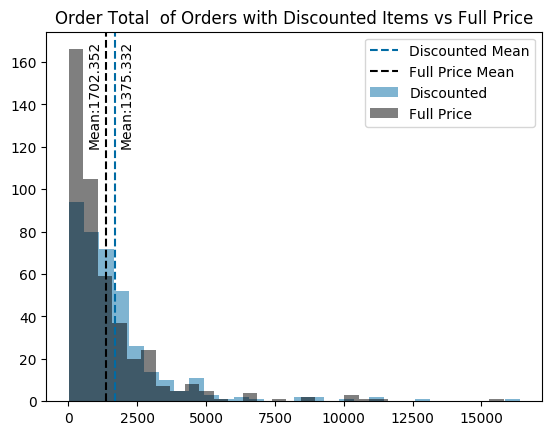

Normality: stat =84.8885831950964, p = 3.6870444289372017e-19


In [91]:
# Plot the re-sampled data

# # IF want to take smaller sample from population:

# pop_samp_disc = np.random.choice(pop_samp_disc,1000)
# pop_samp_full = np.random.choice(pop_samp_full, 1000)
with plt.style.context(('tableau-colorblind10')):
    fig = plt.figure()
    
    plt.title('Order Total  of Orders with Discounted Items vs Full Price')
    
    plt.hist(arrA,alpha = 0.5, bins=30,label='Discounted')
    plt.hist(arrB,color='black', alpha = 0.5, bins=30,label='Full Price')

    # Adding annotations
    meanD = round(np.mean(arrA),3)
    meanS = round(np.mean(arrB),3)
    
    plt.axvline(meanD, linestyle='--',label='Discounted Mean')
    plt.text(meanD-1000,165,f'Mean:{meanD}',rotation=90)
    
    plt.axvline(meanS,color='k',linestyle='--',label='Full Price Mean')
    plt.text(meanS+500,165,f'Mean:{meanS}',rotation=90)


    plt.legend()
    plt.show()

# Run normality testing
stat,p = normaltest(pop_samp_full)
print(f'Normality: stat ={stat}, p = {p}')

# Run ttest
# tstat,tp = stats.ttest_ind(arrA, arrB)
# print(f'T-test: stat ={tstat}, p = {tp}')#tstat,tp
# ax.text(

### Conclusions for Hypothesis 2
- We reject the null hypothesis that there is no effect of an order containing discounted items on the order total.
- Cohen's d indicates it a small effect size.

# Hypothesis 3 - Placeholder


In [0]:
# %whos
df=[]
df_A=[]
df_B=[]
df_disc_codes = []
df_disc_orig = []
df_full_orig = []
df_full_orig_clean = []
df_disc_orig_clean = []
# print(df_to_empty)

# Hypothesis 3 (Taken from Hyppthesis Testing Outline 04-06-19)
Does the time of year affect quantity of items sold?

 - H0 = The month of an order has no affect on the mean quantity of items sold.

 - HA = THe month an order is placed relates to either a higher or lower mean quantity of items sold.


_________
## ***Aim 1.1 : To select the proper dataset for analyiss  and generate data groups for testing.***

#### Importing Method
- Use sqlalchemy to create engine to connect to Northwind_small.sqlite.
ENTER YOUR SQL HERE


In [93]:

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

filepath = '/content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite'
engine = create_engine('sqlite:///'+filepath,echo=True)
inspector = inspect(engine);

# df_employee = pd.read_sql_query("SELECT Id, Title, LastName, HireDate , BirthDate  FROM [EMPLOYEE]", engine )
# df_cust_ord = pd.read_sql_query("SELECT *FROM [Order] JOIN [Customer] ON [Customer].Id = [Order].CustomerId", engine)
print(inspector.get_table_names())

Mounted at /content/drive/
2019-04-07 20:51:25,482 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-07 20:51:25,483 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:25,490 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-07 20:51:25,492 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:25,498 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-07 20:51:25,500 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


### JMI Added table import and filtering.

In [94]:
#JMI checking importing of tables
DB_Order = pd.read_sql_table('Order',engine);
DB_OrderDetail = pd.read_sql_table('OrderDetail',engine);
print(f"DB_Order columns:{DB_Order.columns}n\n DB_OrderDetail columns: {DB_OrderDetail.columns}")

2019-04-07 20:51:25,524 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-07 20:51:25,526 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:25,535 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2019-04-07 20:51:25,538 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:25,543 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Order")
2019-04-07 20:51:25,545 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:25,551 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Order' AND type = 'table'
2019-04-07 20:51:25,553 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:25,558 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Order")
2019-04-07 20:51:25,696 INFO sqlalchemy.engine.base.Engine ()
2019-04-07 20:51:25,700 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  

In [0]:
def df_drop_regex(DF, regex_list):
    '''Use a list of regex to remove columns names. Returns new df.
    
    Parameters:
        DF -- input dataframe to remove columns from.
        regex_list -- list of string patterns or regexp to remove.
    
    Returns:
        df_cut -- input df without the dropped columns. 
        '''
    df_cut = DF.copy()
    
    for r in regex_list:
        
        df_cut = df_cut[df_cut.columns.drop(list(df_cut.filter(regex=r)))]
        print(f'Removed {r}\n')
        
    return df_cut

In [96]:
# TAKE  DB_Orderm rename index, remove unwanted columns
DB_Order.rename({'Id':'OrderId','OrderDate':'OrderPlaced'},axis=1,inplace=True)

# Drop unwanted columns from DB_Orde to make df_Order
regex_to_drop = ['Date','Freight']

df_Order = df_drop_regex(DB_Order, regex_to_drop)
df_Order.rename({'OrderPlaced':'OrderDate'},axis=1,inplace=True)
df_Order.head()

Removed Date

Removed Freight



,OrderId,CustomerId,EmployeeId,OrderDate,ShipVia,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,3,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,1,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,1,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [0]:
# MERGING IMPORT DB_OrderDetail and cleaned df_Order
df_merged = DB_OrderDetail.merge(df_Order, on='OrderId',copy=True)

In [98]:
df_order_geo = df_merged.copy()
df_order_geo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 16 columns):
Id                2155 non-null object
OrderId           2155 non-null int64
ProductId         2155 non-null int64
UnitPrice         2155 non-null float64
Quantity          2155 non-null int64
Discount          2155 non-null float64
CustomerId        2155 non-null object
EmployeeId        2155 non-null int64
OrderDate         2155 non-null object
ShipVia           2155 non-null int64
ShipName          2155 non-null object
ShipAddress       2155 non-null object
ShipCity          2155 non-null object
ShipRegion        2155 non-null object
ShipPostalCode    2100 non-null object
ShipCountry       2155 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 286.2+ KB


In [0]:
# df_order_geo.describe()

In [0]:
# # Remove some columns from df_order_geo

# df_order_geo.drop(['OrderId', 'ShipName', 'ShippedDate', 'RequiredDate', 'ShipVia','ShipAddress',
#              'RequiredDate','ShippedDate', 'Freight'],inplace=True, axis=1)
# # relabel the Id column so they have unique names
# df_order_geo.rename(columns={'Id':'OrderId_'},inplace=True )
# df_order_geo.info()
# # print(f'df_ord.info():\n {df_ord.info()}\n\ndf_order_geo.info():\n{df_order_geo.info()}')


In [100]:
#Apply calc_product_price to every row 
df_price_geo = df_order_geo.apply(lambda x: calc_product_price(x),axis=1)

# Apply_calc_order_total to every row
df_price_geo = df_price_geo.apply(lambda x: calc_order_total(x,df_price_geo), axis=1)  
df_price_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 20 columns):
Id                  2155 non-null object
OrderId             2155 non-null int64
ProductId           2155 non-null int64
UnitPrice           2155 non-null float64
Quantity            2155 non-null int64
Discount            2155 non-null float64
CustomerId          2155 non-null object
EmployeeId          2155 non-null int64
OrderDate           2155 non-null object
ShipVia             2155 non-null int64
ShipName            2155 non-null object
ShipAddress         2155 non-null object
ShipCity            2155 non-null object
ShipRegion          2155 non-null object
ShipPostalCode      2100 non-null object
ShipCountry         2155 non-null object
price               2155 non-null float64
OnSale              2155 non-null int64
discounted_order    2155 non-null int64
order_total         2155 non-null float64
dtypes: float64(4), int64(7), object(9)
memory usage: 353.6+ KB


In [101]:
#convert dates to datetime
df_price_geo['OrderDate'] = pd.to_datetime(df_price_geo.OrderDate )
df_price_geo.OrderDate.agg(['mean','max','min'])

max   2014-05-06
min   2012-07-04
Name: OrderDate, dtype: datetime64[ns]

In [0]:
# concat two dfs
# df_price = pd.concat([df_price, df_ord[['OrderDate']]], axis=1) #, 'EmployeeId', 'employee_title

In [103]:
#
# create columns for day of week and month
df_price_geo['OrderDate'] = pd.to_datetime(df_price_geo.OrderDate)

df_price_geo['week_day'] = df_price_geo['OrderDate'].dt.dayofweek
df_price_geo['month'] = df_price_geo['OrderDate'].dt.month

df_price_geo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 22 columns):
Id                  2155 non-null object
OrderId             2155 non-null int64
ProductId           2155 non-null int64
UnitPrice           2155 non-null float64
Quantity            2155 non-null int64
Discount            2155 non-null float64
CustomerId          2155 non-null object
EmployeeId          2155 non-null int64
OrderDate           2155 non-null datetime64[ns]
ShipVia             2155 non-null int64
ShipName            2155 non-null object
ShipAddress         2155 non-null object
ShipCity            2155 non-null object
ShipRegion          2155 non-null object
ShipPostalCode      2100 non-null object
ShipCountry         2155 non-null object
price               2155 non-null float64
OnSale              2155 non-null int64
discounted_order    2155 non-null int64
order_total         2155 non-null float64
week_day            2155 non-null int64
month               2155 non

In [104]:
#make list of month names (strings) 
months = ['jan','feb', 'mar', 'apr', 'may' , 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']#creating label names
# month_code =
month_dict = dict(zip( list(range(1,len(months)+1)),months)) # zip the two into a dictionary

# MAP THE MONTH_DICT ONTO NEW COLUMN month_name
df_price_geo['month_name'] = df_price_geo['month'].map(month_dict)
df_price_geo['month_name'].value_counts()

apr    261
mar    255
jan    237
feb    201
dec    195
oct    179
may    155
nov    155
aug    153
sep    152
jul    136
jun     76
Name: month_name, dtype: int64

In [105]:
df_price_geo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 23 columns):
Id                  2155 non-null object
OrderId             2155 non-null int64
ProductId           2155 non-null int64
UnitPrice           2155 non-null float64
Quantity            2155 non-null int64
Discount            2155 non-null float64
CustomerId          2155 non-null object
EmployeeId          2155 non-null int64
OrderDate           2155 non-null datetime64[ns]
ShipVia             2155 non-null int64
ShipName            2155 non-null object
ShipAddress         2155 non-null object
ShipCity            2155 non-null object
ShipRegion          2155 non-null object
ShipPostalCode      2100 non-null object
ShipCountry         2155 non-null object
price               2155 non-null float64
OnSale              2155 non-null int64
discounted_order    2155 non-null int64
order_total         2155 non-null float64
week_day            2155 non-null int64
month               2155 non

In [106]:
print(f'The cell above is currently commented out, uncomment to export csv')
# # Ssave df_price_Geo 
# save = input(prompt='Would you like to export the dataframe above? (y/n)\n')
# if save.lower()=='y':
#     filename ='df_H3_price_w_dates_products.csv'
#     df_H3_price_w_dates_products = df_price_geo.copy()
#     df_H3_price_w_dates_products.to_csv(filename)
#     print(f'df_price exported and saved as {filename}...')
#     print(f'if you are running this on Colab:...\nOpen File sidebar, click Refresh, right click on {filename} to Download.')
    
#     filename ='df_H3_price_w_dates_orders.csv'
#     df_H3_price_w_dates_orders = df_H3_price_w_dates_products.drop_duplicates(subset=['OrderId'])
#     df_H3_price_w_dates_orders.to_csv(filename)
#     print(f'if you are running this on Colab:...\nOpen File sidebar, click Refresh, right click on {filename} to Download.')

# else:
#     print('No .csv exported.')

The cell above is currently commented out, uncomment to export csv


## Picking up after Mike's prior code
- Adding df_year_orders = df_price_geo should ensure that the rest of mike's code runs

In [0]:
df_year_orders = df_price_geo.drop_duplicates(subset=['OrderId']).copy()
df_year_orders.set_index('OrderId',inplace=True,verify_integrity=True)
# df_year_orders.info()

In [108]:
# Drop unneeded and misleading formerly product-associated columns
vars_to_drop = ['EmployeeId','ShipVia','ShipAddress','ShipRegion','ProductId','ShipName','Id','price','OnSale']
df_year_orders.drop(vars_to_drop,axis=1,inplace=True)
df_year_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 10248 to 11077
Data columns (total 13 columns):
UnitPrice           830 non-null float64
Quantity            830 non-null int64
Discount            830 non-null float64
CustomerId          830 non-null object
OrderDate           830 non-null datetime64[ns]
ShipCity            830 non-null object
ShipPostalCode      811 non-null object
ShipCountry         830 non-null object
discounted_order    830 non-null int64
order_total         830 non-null float64
week_day            830 non-null int64
month               830 non-null int64
month_name          830 non-null object
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 90.8+ KB


### EDA
 - define uselful functions for visualizations
 - Plotting and visualizing features

#### plot initial order totals by month

In [0]:
#declare variables to be plotted

x = df_year_orders['month']
y = df_year_orders['order_total']
ticks = [v for v in month_dict.values()] 
title = 'Order totals per month with or without discounts'
hue = df_year_orders['Discount']>0

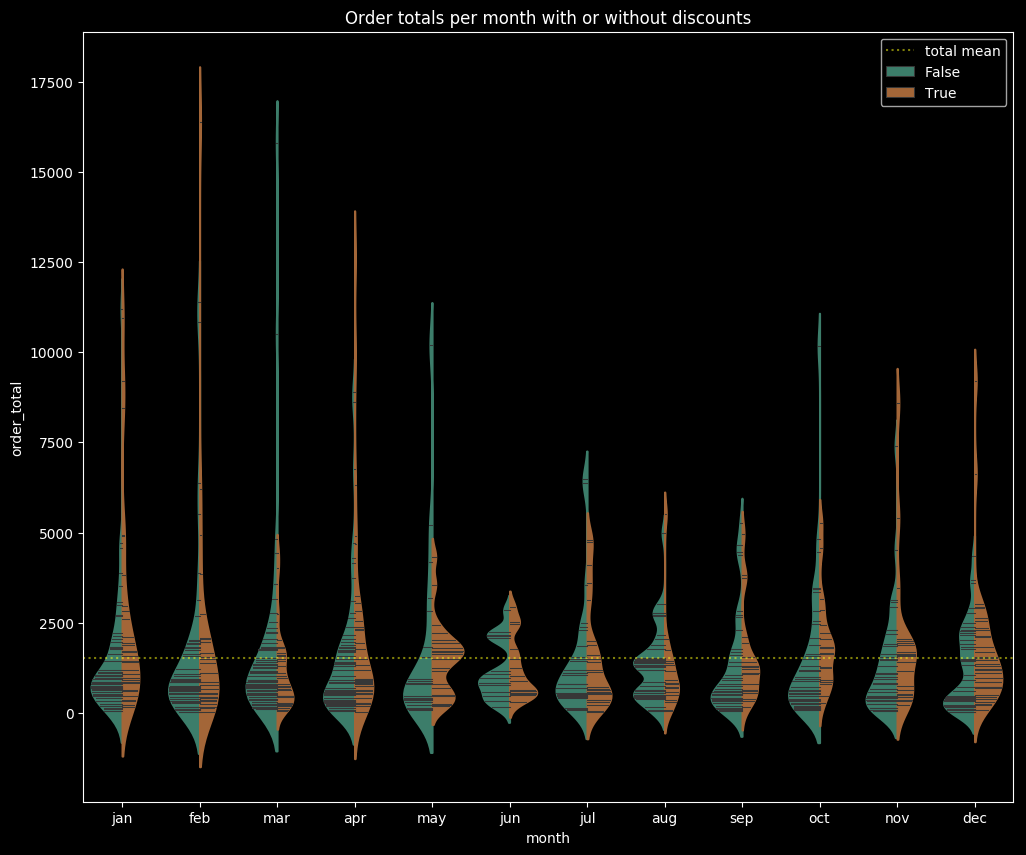

In [110]:
make_violinplot(x,y,title,hue, ticks)

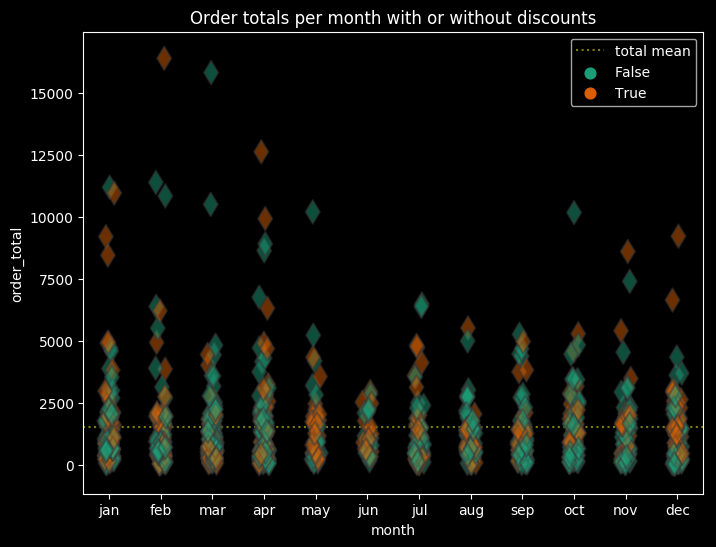

In [111]:
make_stripplot(x,y,title,hue,ticks)

## ***Aim 2 : Test for assumptions of normality and equal variance, then choose test***
---




* ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
    1. **Test for Normality**<br>
        - [Normaltest/ D’Agostino and Pearson’s](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```
    2. **Test for Homogeneity of Variance**<br>
        - [Levene's Test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html)<br>         ```scipy.stats.levene```
    3. **Choose appropriate test based upon 1. and 2.** 
        - [Mann Whitney U Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)<br>  - non parametric equivalent of ANOVA)<br>
    ```stats.mannwhitneyu```<br>
        - Normal: 2 sample t-test
        - Welch's t-test (Jeff)
        
    4.  Calculate effect size, post-hoc tukeys tests.
        - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
          
* ***Aim 3: To perform post-hoc pairwise comparisons for level of discount***      
 
     
    6. If significant result, follow up with post-hoc tests
        - [Tukey's] https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
        ```statsmodels.stats.multicomp.pairwise_tukeyhsd```


#### Histograms month vs all months

In [112]:
df_year_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 10248 to 11077
Data columns (total 13 columns):
UnitPrice           830 non-null float64
Quantity            830 non-null int64
Discount            830 non-null float64
CustomerId          830 non-null object
OrderDate           830 non-null datetime64[ns]
ShipCity            830 non-null object
ShipPostalCode      811 non-null object
ShipCountry         830 non-null object
discounted_order    830 non-null int64
order_total         830 non-null float64
week_day            830 non-null int64
month               830 non-null int64
month_name          830 non-null object
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 130.8+ KB


In [0]:
# draw_histograms_from_sample(df_year_orders, 'month', month_dict, 4, 3)
# df_year_orders[['Quantity','Discount','price','order_total']].describe()

In [114]:
df_year_orders.groupby('month_name').agg(['mean','std','min','max','count'])

UnitPrice                                 Quantity                 \
                 mean        std  min     max count       mean        std min   
month_name                                                                      
apr         25.007905  22.271453  2.5  123.79   105  23.533333  18.802653   2   
aug         26.153966  21.416484  2.0  123.79    58  21.413793  16.387880   1   
dec         22.594937  22.746372  3.6  123.79    79  22.873418  17.150441   1   
feb         24.440482  31.329334  4.5  263.50    83  24.349398  20.917045   3   
jan         29.006818  38.054456  2.0  263.50    88  24.170455  19.499025   2   
jul         27.470545  37.793881  2.0  263.50    55  22.872727  17.372876   3   
jun         23.742667  22.215527  2.5  123.79    30  21.100000  13.727270   4   
mar         27.081068  35.097423  2.0  263.50   103  22.757282  17.413915   1   
may         24.300435  11.071452  4.5   55.00    46  21.478261  17.649349   2   
nov         22.942373  27.842115  3.6  210.80    59  22.474576  15.366057   3   
oct         23.578594  16.280238  2.0   97.00    64  19.546875  15.301136   3   
sep         28.891000  37.459391  2.5  263.50    60  22.950000  18.237998   1   

                       ...   week_day                         month           \
            max count  ...       mean       std min max count  mean  std min   
month_name             ...                                                     
apr         100   105  ...   2.247619  1.984463   0   6   105     4  0.0   4   
aug         100    58  ...   2.293103  1.991285   0   6    58     8  0.0   8   
dec          80    79  ...   2.430380  2.181998   0   6    79    12  0.0  12   
feb         120    83  ...   2.421687  2.024969   0   6    83     2  0.0   2   
jan         100    88  ...   2.329545  1.957723   0   6    88     1  0.0   1   
jul          70    55  ...   2.327273  2.028086   0   6    55     7  0.0   7   
jun          60    30  ...   2.500000  2.208916   0   6    30     6  0.0   6   
mar          84   103  ...   2.485437  2.186698   0   6   103     3  0.0   3   
may          77    46  ...   2.500000  2.116076   0   6    46     5  0.0   5   
nov          70    59  ...   2.457627  2.078810   0   6    59    11  0.0  11   
oct          90    64  ...   2.265625  1.977992   0   6    64    10  0.0  10   
sep         100    60  ...   2.533333  2.182105   0   6    60     9  0.0   9   

                      
           max count  
month_name            
apr          4   105  
aug          8    58  
dec         12    79  
feb          2    83  
jan          1    88  
jul          7    55  
jun          6    30  
mar          3   103  
may          5    46  
nov         11    59  
oct         10    64  
sep          9    60  

[12 rows x 35 columns]

### New Worfklow from Mike

In [0]:
# create a dict to test stats
dict_to_test ={}
for month in list(df_year_orders['month_name'].unique()):
    dict_to_test[month] = df_year_orders.groupby('month_name').get_group(month)

In [116]:
for k,v in dict_to_test.items():
    print(f'{k} has: {len(v)} rows.')
# len(dict_to_test.values())
# dict_to_test.keys()

jul has: 55 rows.
aug has: 58 rows.
sep has: 60 rows.
oct has: 64 rows.
nov has: 59 rows.
dec has: 79 rows.
jan has: 88 rows.
feb has: 83 rows.
mar has: 103 rows.
apr has: 105 rows.
may has: 46 rows.
jun has: 30 rows.


### Aim 2.1: Test for Normality

In [0]:
H3_tests = [['Group:','TestName','Test Purpose','stat','p','sig?']  ]

In [118]:
from scipy.stats import normaltest

for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month]['order_total']

    #1. Test for normality
    test_purpose = 'Normality'
    test_to_run = 'normaltest'

    arrA = np.array(arrA)
    statA, pA = eval(test_to_run)(arrA)

    H3_tests.append([month, test_to_run, test_purpose ,statA, pA, pA<0.05])
    
arrB = np.array(df_year_orders['order_total'])
stat, p = eval(test_to_run)(arrB)
H3_tests.append(['Total Pop', test_to_run, test_purpose,stat, p,p<0.05])


H3_results_norm = list2df(H3_tests)
H3_results_norm

,Group:,TestName,Test Purpose,stat,p,sig?
0,jul,normaltest,Normality,28.482051,6.534332e-07,True
1,aug,normaltest,Normality,35.416298,2.039147e-08,True
2,sep,normaltest,Normality,20.546302,3.454835e-05,True
3,oct,normaltest,Normality,55.131433,1.067484e-12,True
4,nov,normaltest,Normality,47.558321,4.708059e-11,True
5,dec,normaltest,Normality,65.102052,7.299096e-15,True
6,jan,normaltest,Normality,71.688386,2.710596e-16,True
7,feb,normaltest,Normality,91.351570,1.456326e-20,True
8,mar,normaltest,Normality,139.721993,4.568301e-31,True
9,apr,normaltest,Normality,81.806603,1.721558e-18,True


### Aim 2.2: Test for Homogneity of Variance
- Levenes Test

In [119]:
from scipy.stats import levene

for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month]['order_total']
    arrB = df_year_orders[df_year_orders['month_name']!= month]['order_total']
    #1. Test for normality
    test_to_run = 'levene'
    test_purpose = 'Equal Variance'

    arrA = np.array(arrA)
    arrB = np.array(arrB)

    stat, p = eval(test_to_run)(arrA,arrB,center='median')
    
    H3_tests.append([f'{month} vs. Other Months', test_to_run, test_purpose ,stat, p, p<0.05])


list2df(H3_tests)

,Group:,TestName,Test Purpose,stat,p,sig?
0,jul,normaltest,Normality,28.482051,6.534332e-07,True
1,aug,normaltest,Normality,35.416298,2.039147e-08,True
2,sep,normaltest,Normality,20.546302,3.454835e-05,True
3,oct,normaltest,Normality,55.131433,1.067484e-12,True
4,nov,normaltest,Normality,47.558321,4.708059e-11,True
5,dec,normaltest,Normality,65.102052,7.299096e-15,True
6,jan,normaltest,Normality,71.688386,2.710596e-16,True
7,feb,normaltest,Normality,91.351570,1.456326e-20,True
8,mar,normaltest,Normality,139.721993,4.568301e-31,True
9,apr,normaltest,Normality,81.806603,1.721558e-18,True


### Aim 2.3. Choose Appropriate Test Based on Testing Assumptions

- Note: We did not meet the criteria for normality or equal variance. 
- ~~Perform a Mann-Whitney U test~~
- Perofrm Tuke's pairwise test

### Use Tukey's Pairwise Multiple Comparison test.
```statsmodels.stats.multicomp.pairwise_tukeyhsd```

In [120]:
# Importing tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey

# Defome the dataframe containing column of interest and group labels. 
df_test_hypothesis = df_year_orders[['order_total','month_name','week_day']]
grp_labels = df_test_hypothesis['month_name']


# Run tukey's test
tukey_results =tukey(df_test_hypothesis['order_total'], grp_labels, 0.05)


# Save the results into a dataframe
dfH_tukey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
dfH_tukey
# dfH_tukey.loc[dfH_tukey['reject']==True] # To show just significant results.

,group1,group2,meandiff,lower,upper,reject
0,apr,aug,-429.4049,-1421.7047,562.8950,False
1,apr,dec,-207.6797,-1111.0347,695.6754,False
2,apr,feb,-22.6780,-913.5247,868.1687,False
3,apr,jan,82.7094,-793.8885,959.3073,False
4,apr,jul,-249.8789,-1259.4613,759.7034,False
5,apr,jun,-472.0174,-1727.6696,783.6348,False
6,apr,mar,-291.8645,-1133.0197,549.2908,False
7,apr,may,-116.3951,-1188.8343,956.0440,False
8,apr,nov,-173.3675,-1160.2354,813.5004,False
9,apr,oct,-54.9710,-1016.8412,906.8993,False


In [121]:
# # Save the results into a dataframe
# dfH_tukey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
dfH_tukey.loc[dfH_tukey['reject']==True]

,group1,group2,meandiff,lower,upper,reject


### SAVE THIS: using groupby to get mean, sem, for plotting

In [0]:
# WANT TO CALCULATE MEAN AND SEM FOR BAR PLOT FOR DF
# Calc Standard Error of the Mean for PLotting.
from scipy.stats import sem

d_plot={}
d_plot['mean'] = df_year_orders.groupby(['month'])['order_total'].mean()
d_plot['sem'] =df_year_orders.groupby(['month'])['order_total'].sem()

df_plot = pd.DataFrame.from_dict(d_plot)

# Convert month index to month_num column
df_plot['month_num'] = df_plot.index

# Use month_dict to get months labeled with names
df_plot['month_name']=df_plot['month_num'].map(month_dict)
df_plot.set_index('month_name',drop=False,inplace=True)

In [123]:
df_plot

,mean,sem,month_num,month_name
month_name,,,,
jan,1766.820233,229.216484,1,jan
feb,1661.432801,284.949716,2,feb
mar,1392.246359,195.747163,3,mar
apr,1684.110810,210.208624,4,apr
may,1567.715663,261.780574,5,may
jun,1212.093417,152.376840,6,jun
jul,1434.231864,204.700933,7,jul
aug,1254.705948,141.289027,8,aug
sep,1366.844042,172.444868,9,sep


[Text(0, 0.5, 'Order Total($)'), Text(0.5, 0, 'Month')]

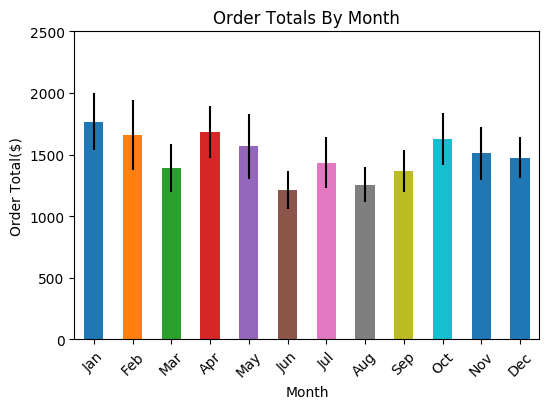

In [124]:
plt.style.use('default')
bar_kws = {'figsize':[6,4],
          'title': 'Order Totals By Month',
          'grid':False,
          'legend':False,
          'rot':45,
           'yerr':'sem',
          'ylim': [0,2500]}

fig = df_plot.plot(kind='bar',x=df_plot.index.str.title(),y='mean',**bar_kws)#,table=True)
fig.set(**{'xlabel':'Month','ylabel':'Order Total($)'})

## ***Conclusions for Hypothesis 3:***
1. **We first used D'Agostino & Perason's test (normaltest) to check for normal distributions**
        - We rejecteded the null hypothesis that the groups came from a populatiin with a normal distribtuion. 
2. **We tested for equal variances using Levene's test. **
    - Level's test had a signifcant p-value, so we rejected the hypothesis that the groups have equal variances
    
3. **We then concluded we need a non-parametric test for 12 samples, so we used the Tukey's pairwise multple comparison test**. 



In [125]:

H3_tests_table = list2df(H3_tests)
H3_tests_table

,Group:,TestName,Test Purpose,stat,p,sig?
0,jul,normaltest,Normality,28.482051,6.534332e-07,True
1,aug,normaltest,Normality,35.416298,2.039147e-08,True
2,sep,normaltest,Normality,20.546302,3.454835e-05,True
3,oct,normaltest,Normality,55.131433,1.067484e-12,True
4,nov,normaltest,Normality,47.558321,4.708059e-11,True
5,dec,normaltest,Normality,65.102052,7.299096e-15,True
6,jan,normaltest,Normality,71.688386,2.710596e-16,True
7,feb,normaltest,Normality,91.351570,1.456326e-20,True
8,mar,normaltest,Normality,139.721993,4.568301e-31,True
9,apr,normaltest,Normality,81.806603,1.721558e-18,True


4. **To determine which level of discounts had the largest effect, we performed a pairwise multiple comparison Tukey's test**. 
    - Our results showed that 
    

In [126]:
# stop

# Importing tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukey
df_test_hypothesis = df_year_orders[['order_total','month_name','week_day']]
grp_labels = df_test_hypothesis['week_day']


tukey_results_weekday =tukey(df_test_hypothesis['order_total'], grp_labels, 0.05)
print(tukey_results_weekday.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower    upper   reject
-------------------------------------------------
  0      1     -56.1493 -609.8688 497.5702 False 
  0      2    -123.4291 -674.6487 427.7905 False 
  0      3     107.6829 -446.8877 662.2534 False 
  0      6     34.6381  -519.0814 588.3576 False 
  1      2     -67.2798 -620.9993 486.4397 False 
  1      3     163.8322 -393.2232 720.8876 False 
  1      6     90.7874  -465.4207 646.9956 False 
  2      3     231.112  -323.4586 785.6825 False 
  2      6     158.0672 -395.6523 711.7867 False 
  3      6     -73.0448 -630.1001 484.0106 False 
-------------------------------------------------


#### Calculating Effect Size

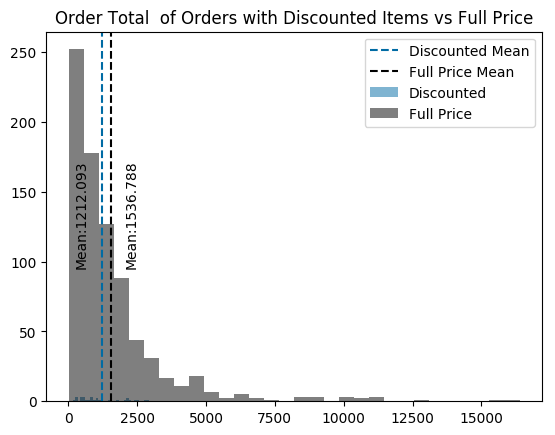

Normality: stat =84.8885831950964, p = 3.6870444289372017e-19


In [127]:
# Plot the re-sampled data

# # IF want to take smaller sample from population:

# pop_samp_disc = np.random.choice(pop_samp_disc,1000)
# pop_samp_full = np.random.choice(pop_samp_full, 1000)
with plt.style.context(('tableau-colorblind10')):
    fig = plt.figure()
    
    plt.title('Order Total  of Orders with Discounted Items vs Full Price')
    
    plt.hist(arrA,alpha = 0.5, bins=30,label='Discounted')
    plt.hist(arrB,color='black', alpha = 0.5, bins=30,label='Full Price')

    # Adding annotations
    meanD = round(np.mean(arrA),3)
    meanS = round(np.mean(arrB),3)
    
    plt.axvline(meanD, linestyle='--',label='Discounted Mean')
    plt.text(meanD-1000,165,f'Mean:{meanD}',rotation=90)
    
    plt.axvline(meanS,color='k',linestyle='--',label='Full Price Mean')
    plt.text(meanS+500,165,f'Mean:{meanS}',rotation=90)


    plt.legend()
    plt.show()

# Run normality testing
stat,p = normaltest(pop_samp_full)
print(f'Normality: stat ={stat}, p = {p}')

# Run ttest
# tstat,tp = stats.ttest_ind(arrA, arrB)
# print(f'T-test: stat ={tstat}, p = {tp}')#tstat,tp
# ax.text(

Aim 2.4: Calculate Effect Size via Cohen's d

In [128]:

for month,  df  in dict_to_test.items(): #month = key, df = values

    arrA = dict_to_test[month][['order_total']]
    arrB = df_year[df_year['month_name']!= month]['order_total']
    #1. Test for normality
    test_to_run = 'cohens'
    test_purpose = 'Equal Variance'

    arrA = np.array(arrA)
    arrB = np.array(arrB)

    stat, p = eval(test_to_run)(arrA,arrB,center='median')
    
    H3_tests.append([f'{month} & rest of pop', test_to_run, test_purpose ,stat, p])

NameError: ignored

# Hypothesis 4 - JMI

$H_1$ 

$H_0$ : 

**Specific Aims:**

* ***Aim 1:To select the proper dataset for analysis, perform EDA, and generate data groups for testing.***
    - Used sqlalchemy and pandas.read_sql_query()
    query = 

* ***Aim 2: Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.***
    1. **Test for Normality**
        - D'Agostino-Pearson's normality test<br>
        ```scipy.stats.normaltest```
        - Shapiro-Wilik Test<br>
        ```scipy.stats.shapiro```
    2. **Test for Homogeneity of Variance**
        - Levene's Test<br>
         ```scipy.stats.levene```

    3. **Choose appropriate test based upon 1. and 2.** 


* ***Aim 3: To perform post-hoc painrwise comparison testing to determine which level of discounts affect quantity and if any discount has a greater effect than the others.***
     - Tukey's test for multiple pairwise comparisons


_________
## ***Aim 1.1 : To select the proper dataset for analyiss  and generate data groups for testing.***

#### Importing Method
- Use sqlalchemy to create engine to connect to Northwind_small.sqlite.
- use pd.read_sql_query('SELECT * FROM OrderDetail',egine) to directly read db into df

In [0]:
df_H4 = df_H3_price_w_dates_products
df_H4.set_index('Id',inplace=True)
df_H4.head()


In [0]:
# df_H4.info()

In [0]:
# # #CELL A : IF ON COLAB.
# # #The northwind.sqlite is located in: content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

# # # If in Google Drive 
# filepath = '/content/drive/My Drive/Colab Notebooks/datasets/Northwind_small.sqlite'

In [0]:
# #CELL B: If RUNNING LOCALLY.
# filepath = 'Northwind_small.sqlite'

##  H4: Some countries  are more responsive to discounts thatn others.
- Group by country.
- Compare disc vs full-price?
    1. Amount ($)spent on products
    2. Quantity of products 
- Compare by calculating:
    1. discount - no discount
    2. discount/(total)
    3. dscount / no-discount
    

In [0]:
df = df_H4.copy()

In [0]:
df.groupby(['ShipCountry','OnSale'])['Quantity','price'].agg(['mean','std','count'])

## Aim 1.2: Using EDA to decide best metric for hypothesis

### Look through all countries, check if they have both classes of items, then separate them into D_country dictionary 

In [0]:
D_country = {}
countries = list(df['ShipCountry'].unique())

for country in countries:
    
    check_if_discounted = len(df.groupby('ShipCountry').get_group(country)['OnSale'].unique())
    
    if check_if_discounted < 2:
        print(f'{country} did not have both discounted and non-discounted items.')
        continue
        
    else:
    
        D_country[country]={}

        D_country[country]['df_sale'] = df.loc[df['OnSale']==1].groupby('ShipCountry').get_group(country)
        D_country[country]['df_fullprice'] = df.loc[df['OnSale']==0].groupby('ShipCountry').get_group(country)

        D_country[country]['price']={}
        D_country[country]['price']['OnSale'] = D_country[country]['df_sale']['price']
        D_country[country]['price']['FullPrice'] = D_country[country]['df_fullprice']['price']

        D_country[country]['quantity']={}
        D_country[country]['quantity']['OnSale'] = D_country[country]['df_sale']['Quantity']
        D_country[country]['quantity']['FullPrice'] = D_country[country]['df_fullprice']['Quantity']

#     D_country[country] = df.groupby(['ShipCountry','OnSale']).get_group(country)

In [0]:
dC = D_country

# price_sale-full = []
results=pd.DataFrame()
results = [['country','Price_Disc-Full','Price_Disc/Total','Quant_Disc-Full','Quant_Disc/Total','AvgPrice_Disc','AvgPrice_Full']]
for c in dC.keys():
    
    temp = ['country','Price_Disc-Full','Price_Disc/Total','Quant_Disc-Full','Quant_Disc/Total','AvgPrice_Disc','AvgPrice_Full']
    
    calc = dC[c]
    
    i=0
    
    # country name
    temp[i] = c
    i+=1
    #price sub
    temp[i] = calc['price']['OnSale'].sum() - calc['price']['FullPrice'].sum()
    i+=1
    # price/total
    temp[i] =  calc['price']['OnSale'].sum() / ( calc['price']['FullPrice'].sum() + calc['price']['OnSale'].sum() )
    i+=1
    # quantitty sub
    temp[i] = calc['quantity']['OnSale'].sum() - calc['quantity']['FullPrice'].sum()
    i+=1
    # quantity total
    temp[i] = calc['quantity']['OnSale'].sum() / ( calc['quantity']['FullPrice'].sum() + calc['quantity']['OnSale'].sum() )
    i+=1
    # average spent on sale items
    temp[i] = calc['price']['OnSale'].sum()  / calc['quantity']['OnSale'].sum() 
    i+=1
   # average spent on full price items
    temp[i] = calc['price']['FullPrice'].sum()  / calc['quantity']['FullPrice'].sum() 


    
    
    results.append(temp)
# sum(D_country['USA']['df_sale']['Quantity']) - sum(D_country['USA']['df_fullprice']['Quantity'])


df_countries = list2df(results)
df_countries.set_index('country',inplace=True)
df_countries.sort_index().round(3)

In [0]:
# def calc_mean_mean_sem(column):
#     column.name
#     col_mean = column.mean()
#     col_sem = column.sem()
#     column.append(col_mean,col_sem)
#     return columns
# df_countries.plot(kind='bar',subplots=True,sharex=True,figsize=(10,8))
# plt.tight_layout
# total_row = df_countries.apply(lambda x: calc_mean_mean_sem(x),axis=1)
df_header = df_countries.columns
country_col_means = pd.Series(df_countries.mean(axis=0))
country_col_sem = pd.Series(df_countries.sem(axis=0))
country_col_std = pd.Series(df_countries.std(axis=0))

# test['']
df_test = pd.DataFrame([country_col_means, country_col_sem,country_col_std],columns=df_header)
df_test.index = ['mean','sem','std']
df_test

In [0]:
# trying to make a p0opulatuon from df_test
from scipy.stats import rv_continuous as rvs
for country in df_countries 
pop = 

In [0]:
# bar_kws = {'figsize':[6,4],
#           'title': 'Order Totals By Month',
#           'grid':False,
#           'legend':False,
#           'rot':45}

for col in df_countries.columns:
    fig = plt.figure()
    
    plt.bar(x=df_countries.index, height=df_countries[col],yerr=df_test.loc['sem',col])#,**bar_kws)
    ax = fig.gca()
    ax.set_xticklabels(df_countries.index, rotation=45)
    ax.set_ylabel(col)
    plt.tight_layout
# plt.bar(x=df_countries.index, y=df_countries['Price_Disc-Full'], country_col_means)

In [0]:
# df_countries.plot(kind='bar',subplots=True,sharex=True,figsize=(10,8))
import math as mt
plt.style.use('default')
bar_kws = {'figsize':[8, 8],
#           'title': 'Prference for Discounts by Country',
          'grid':False,
          'legend':False,
          'rot':45,
          'subplots':True,
          'sharex' : True, 
#            'yerr':total_row["sem"],
           'ecolor':'black',

#           'layout':(mt.ceil(len(df_countries)/2),2)}
#            'yerr':'sem',
#           'ylim': [0,2500]}
          }

    
fig = df_countries.plot(kind='bar',**bar_kws)#,table=True)
plt.tight_layout()


# fig.set(**{'xlabel':'Month','ylabel':'Order Total($)'})

# for num, ax in enumerate(fig):
#     ax.set_ylabel(df_countries.columns[num])

In [0]:
# df_countries.to_excel('df_country_calcs.xlsx')

### Deciding which metric to use
- Difference scores seem more helpful 
- Use Price Difference and Quant Difference

In [0]:
# Separate groups 
# 1. country > discounted > price